## Figure plotting for whole brain dataset (b1-20)

Clustering done in different scripts, now loading final object for plotting visually coherent pictures.

In [1]:
library(Seurat)
library(patchwork)
library(ggplot2)
library(dplyr)
library(RColorBrewer)
library(gridExtra)
library(cowplot)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [3]:
print(sessionInfo())

R version 4.1.3 (2022-03-10)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur/Monterey 10.16

Matrix products: default
BLAS/LAPACK: /Users/nmitic/opt/miniconda3/envs/seuratv4_base/lib/libopenblasp-r0.3.21.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] cowplot_1.1.1      gridExtra_2.3      RColorBrewer_1.1-3 dplyr_1.0.10      
[5] ggplot2_3.3.6      patchwork_1.1.2    sp_1.5-0           SeuratObject_4.1.2
[9] Seurat_4.2.0      

loaded via a namespace (and not attached):
  [1] Rtsne_0.16            colorspace_2.0-3      deldir_1.0-6         
  [4] ellipsis_0.3.2        ggridges_0.5.4        IRdisplay_1.1        
  [7] base64enc_0.1-3       spatstat.data_3.0-0   leiden_0.4.3         
 [10] listenv_0.8.0         ggrepel_0.9.1         fansi_1.0.3          
 [13] codetools_0.2-18      splines_4.1.3         polyclip_1.10-4      
 [16] IRkernel_1.3     

### UMAP main figure

brain_pool <- readRDS(file = "/local/Nina/jupyterlab/brains_trans/brain_pool_corr_reg.rds")

In [38]:
#saveRDS(brain_pool, file = "/local/Nina/jupyterlab/brains_trans/brain_pool_corr_reg.rds")

In [8]:
dim(brain_pool)

[1]  24332 107598

In [5]:
table(brain_pool$major_celltypes_pc28_res0.6)


          Neurons       Radial glia      Immune cells   Oligodendroglia 
            64582             16387             10234             10949 
  Ependymal cells      Erythrocytes  Epithelial cells Endothelial cells 
             1645              1575              1524               702 

In [3]:
table(brain_pool$orig.ident)


 b10_cer b10_dien   b10_ot  b10_tel b11_mult b12_mult b13_mult b14_gfap 
    7954     5065     5293      766     2272     7080    11857      170 
b15_mult b16_gfap b17_tdmr b18_dien  b18_mes b18_rhom b19_tdmr   b1_tel 
    5306     2199     9232     6080     9847     8179     5509     1454 
b20_gfap   b2_tel   b3_tel   b4_tel   b5_tel   b6_tel   b7_cer  b7_dien 
    2795     1188     1167      870      736     4404      753     1756 
  b7_tel  b8_mult   b9_tel 
    1520     2674     1472 

In [4]:
str(brain_pool@meta.data)

'data.frame':	107598 obs. of  18 variables:
 $ orig.ident                 : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ nCount_RNA                 : num  870 1362 4597 2350 692 ...
 $ nFeature_RNA               : int  428 353 1522 1038 230 236 356 652 1027 308 ...
 $ multiseq.relative.1.7      : chr  NA NA NA NA ...
 $ brain_reg                  : chr  "tel" "tel" "tel" "tel" ...
 $ kit_chem                   : chr  "3prim_v1" "3prim_v1" "3prim_v1" "3prim_v1" ...
 $ fixation                   : chr  "fresh" "fresh" "fresh" "fresh" ...
 $ percent.mt                 : num  2.11 2.103 0.247 0.375 1.616 ...
 $ ident                      : chr  "b1_tel" "b1_tel" "b1_tel" "b1_tel" ...
 $ scDblFinder.class          : chr  "singlet" "singlet" "singlet" "singlet" ...
 $ scDblFinder.score          : num  0.0123 0.0455 0.9092 0.7495 0.0435 ...
 $ scDblFinder.weighted       : num  0.116 0.189 0.838 0.817 0.253 ...
 $ scDblFinder.cxds_score     : num  0.01155 0.00941 0.59533 0.14363 0.01259 ...

In [36]:
# set up palette for major cell types based on 
#https://colorbrewer2.org/#type=qualitative&scheme=Set3&n=12
# manually assign colors to preferred groups

mct_colors <- c("Neurons" = "#80b1d3", #blue
               "Radial glia" = "#bebada", #purple
               "Oligodendroglia" = "#fccde5", #pink
               "Immune cells" = "#8dd3c7", #green
               "Ependymal cells" = "#ffed6f", #yellow
               "Erythrocytes" = "#fb8072", #red
               "Epithelial cells" = "#d9d9d9", #grey
               "Endothelial cells" = "#fdb462" #orange
              )

In [2]:
mct_colors

Neurons       Radial glia   Oligodendroglia      Immune cells 
        "#80b1d3"         "#bebada"         "#fccde5"         "#8dd3c7" 
  Ependymal cells      Erythrocytes  Epithelial cells Endothelial cells 
        "#ffed6f"         "#fb8072"         "#d9d9d9"         "#fdb462"

In [3]:
df_colors <- data.frame("Celltype_major" = names(mct_colors),
                       "Color" = mct_colors)

In [4]:
df_colors

Celltype_major    Color  
Neurons           Neurons           #80b1d3
Radial glia       Radial glia       #bebada
Oligodendroglia   Oligodendroglia   #fccde5
Immune cells      Immune cells      #8dd3c7
Ependymal cells   Ependymal cells   #ffed6f
Erythrocytes      Erythrocytes      #fb8072
Epithelial cells  Epithelial cells  #d9d9d9
Endothelial cells Endothelial cells #fdb462

In [5]:
write.csv(df_colors, file = "/local/Nina/jupyterlab/brains_trans/mct_colors.csv",
          row.names = FALSE)

In [6]:
Idents(brain_pool) <- "major_celltypes_pc28_res0.6"

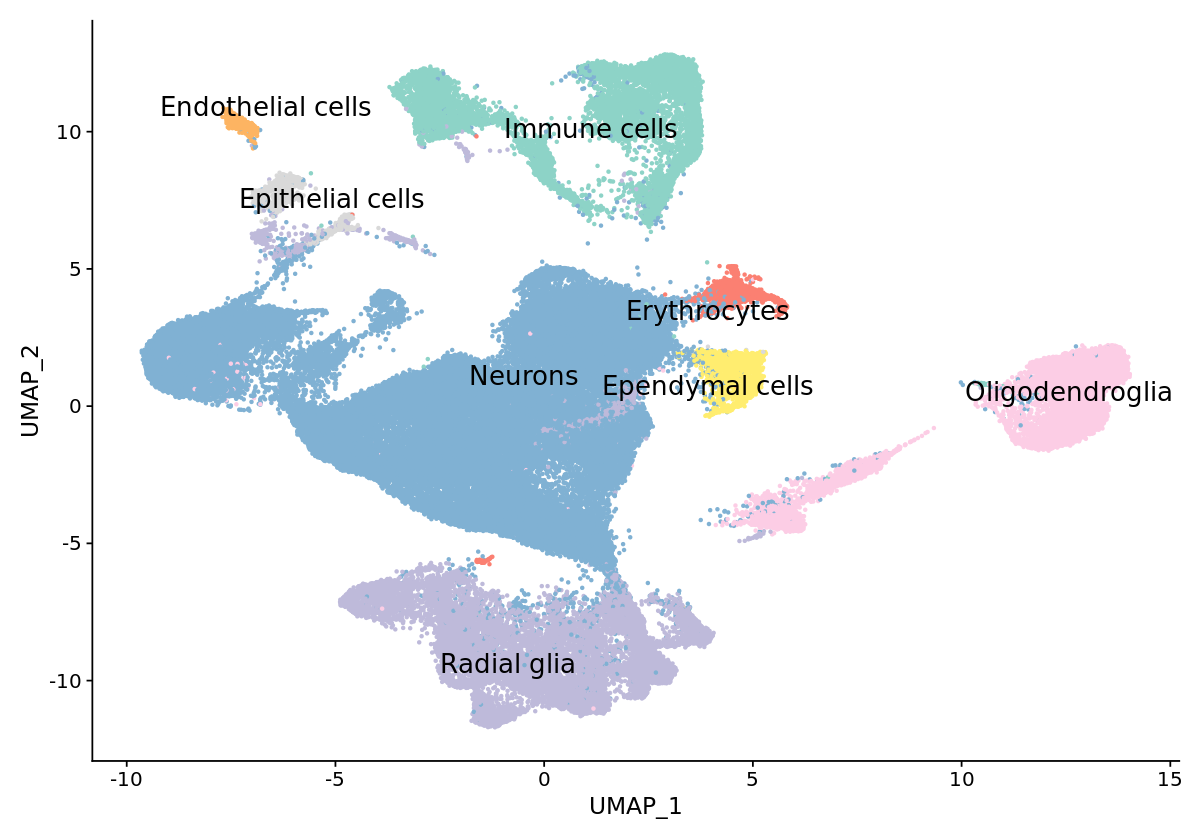

In [9]:
options(repr.plot.width=10, repr.plot.height=7)

DimPlot(object = brain_pool, reduction = 'umap', label = TRUE, cols = mct_colors, label.size = 5.5, pt.size = 0.6, repel = TRUE, raster = FALSE) + NoLegend()

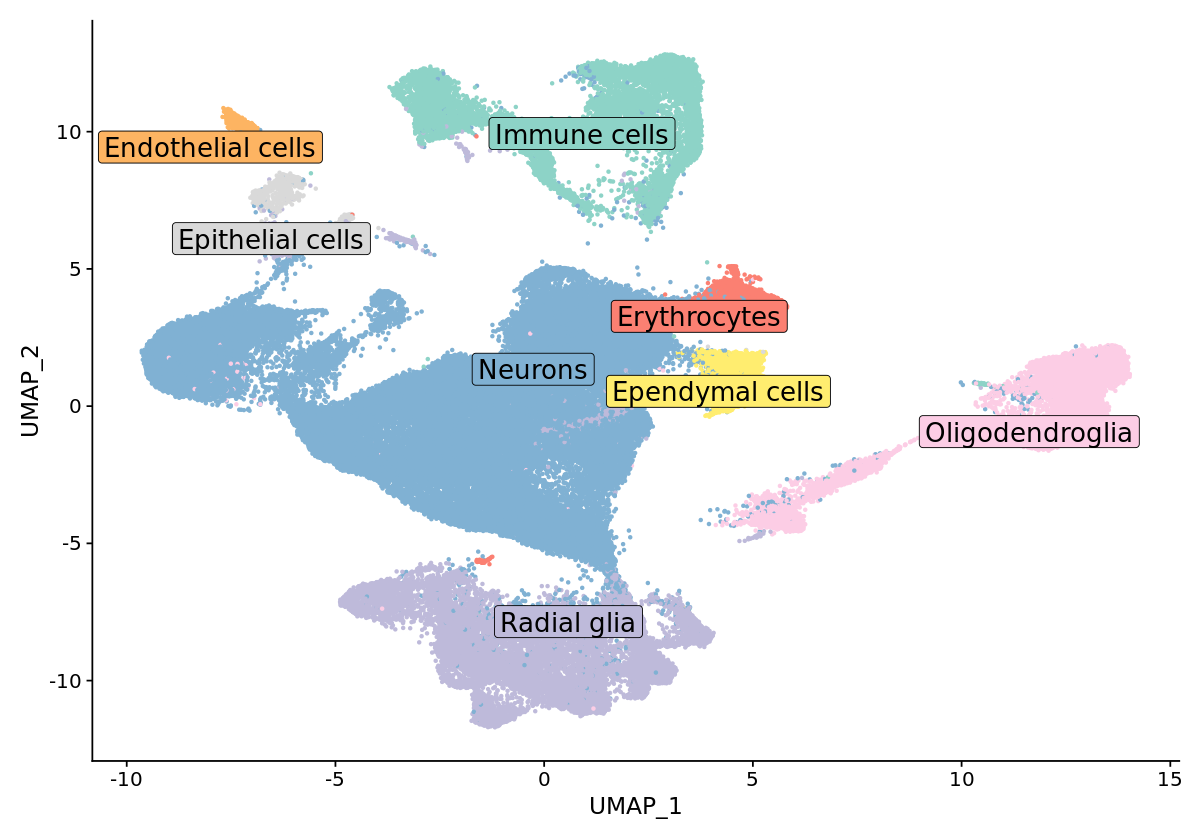

In [10]:
options(repr.plot.width=10, repr.plot.height=7)

umap_lab <-DimPlot(object = brain_pool, reduction = 'umap', label = TRUE, cols = mct_colors, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, repel = TRUE, raster = FALSE) + NoLegend()
umap_lab

In [11]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_umap_lab_box.pdf",
       plot = umap_lab, units = "in", height = 7, width = 10)

### UMAP for supplement

#### Numeric cluster IDs

In [3]:
Idents(brain_pool) <- "seurat_clusters"

Pick colors that are distinct on UMAP.

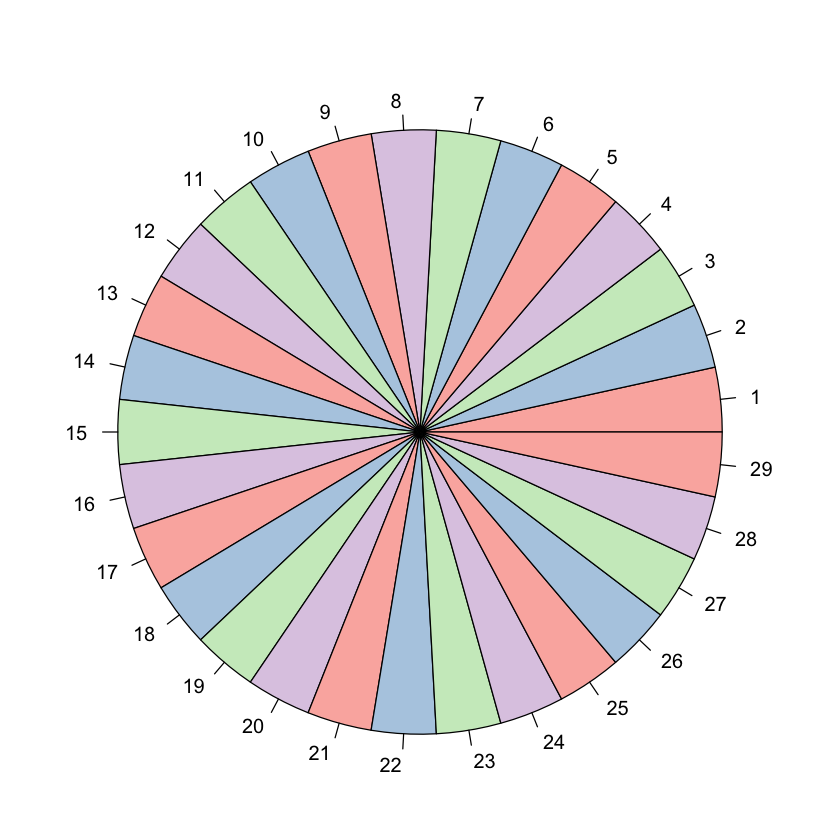

In [4]:
# No margin
par(mar=c(0,0,1,0))

# start with basic palette of Rcolor brewer, with 4 colors
col <- brewer.pal(4, "Pastel1") 

# Add more colors to this palette :
umap_simple_col <- colorRampPalette(col)(29)

# Plot it
pie(rep(1, length(umap_simple_col)), col = col , main="")

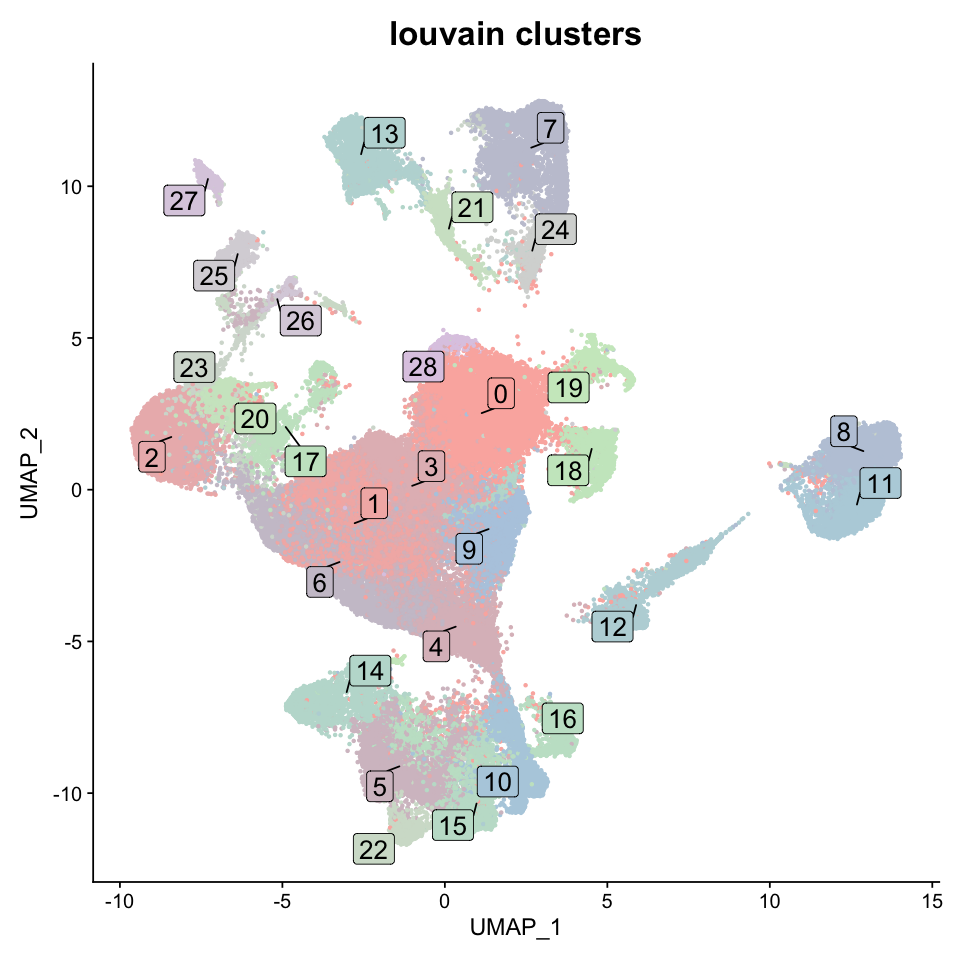

In [16]:
options(repr.plot.width=8, repr.plot.height=8)

umap_lab_num <- DimPlot(object = brain_pool, reduction = 'umap', label = TRUE, cols = umap_simple_col, 
        label.size = 5.5, label.box = TRUE, pt.size = 0.6, repel = TRUE, raster = FALSE) + 
        NoLegend() + labs(title = "louvain clusters") + theme(plot.title = element_text(size = 20, hjust = 0.5))
umap_lab_num

In [17]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_umap_lab_numbered.pdf",
       plot = umap_lab_num, units = "in", height = 6, width = 6)

#### Orig_ident

In [25]:
Idents(brain_pool) <- "orig.ident"

In [26]:
table(brain_pool@active.ident)


  b1_tel   b2_tel   b3_tel   b4_tel   b5_tel   b6_tel   b7_tel   b7_cer 
    1454     1188     1167      870      736     4404     1520      753 
 b7_dien  b8_mult   b9_tel  b10_tel   b10_ot  b10_cer b10_dien b11_mult 
    1756     2674     1472      766     5293     7954     5065     2272 
b12_mult b13_mult b14_gfap b15_mult b16_gfap b17_tdmr b18_dien  b18_mes 
    7080    11857      170     5306     2199     9232     6080     9847 
b18_rhom b19_tdmr b20_gfap 
    8179     5509     2795 

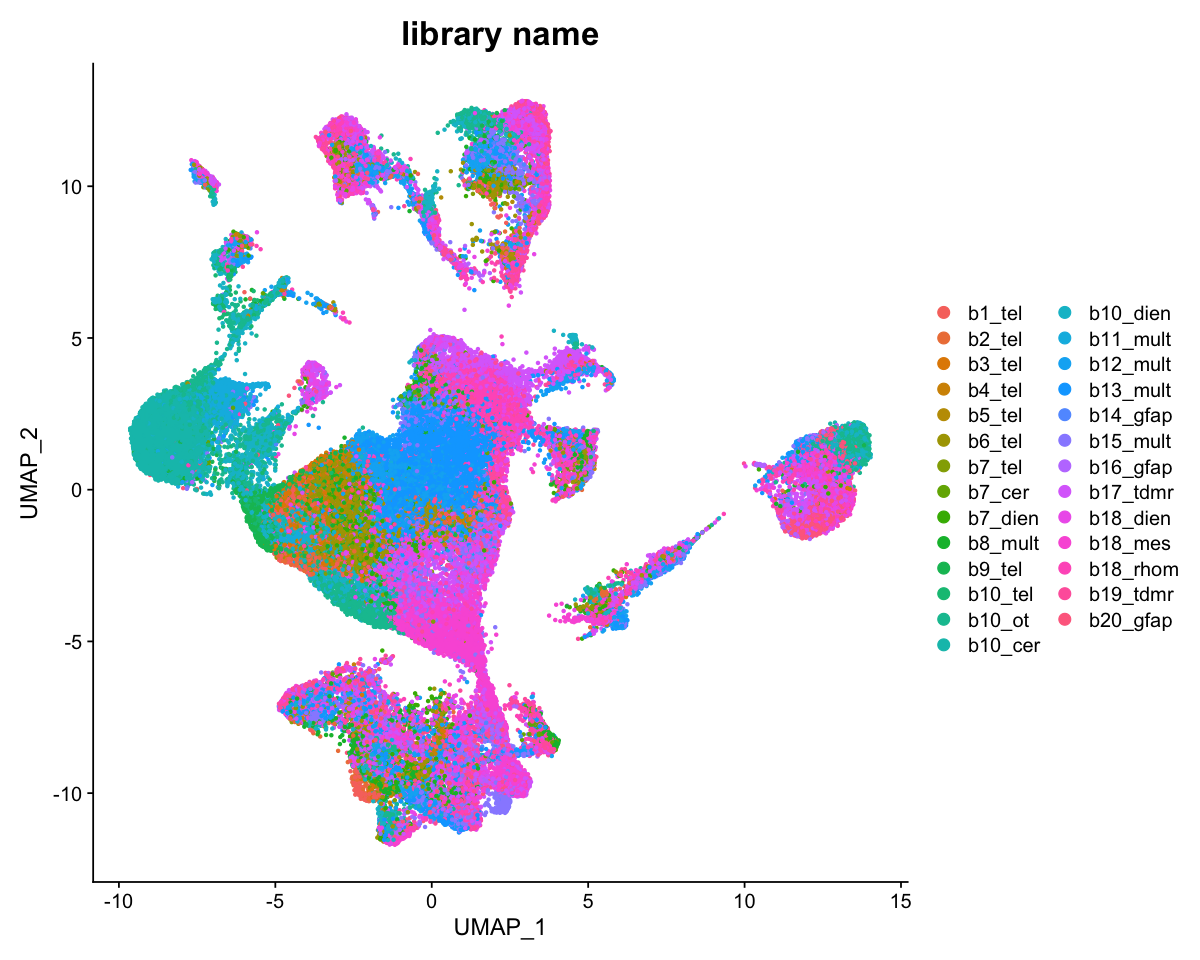

In [27]:
options(repr.plot.width=10, repr.plot.height=8)

umap_orid <- DimPlot(object = brain_pool, reduction = 'umap', label = FALSE, 
        pt.size = 0.6, raster = FALSE, shuffle = TRUE) + 
        labs(title = "library name") + theme(plot.title = element_text(size = 20, hjust = 0.5))
umap_orid

In [28]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_umap_orig_ident.pdf",
       plot = umap_orid, units = "in", height = 6, width = 8)

#### Library type

In [19]:
Idents(brain_pool) <- "library_type"

In [20]:
table(brain_pool@active.ident)


dissected     whole    sorted 
    58504     43930      5164 

In [21]:
# pallette for library types based on https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=5
libtype_colors <- c("dissected" = "#66c2a5", 
                "sorted" = "#e78ac3", 
                "whole" = "#8da0cb"
                )

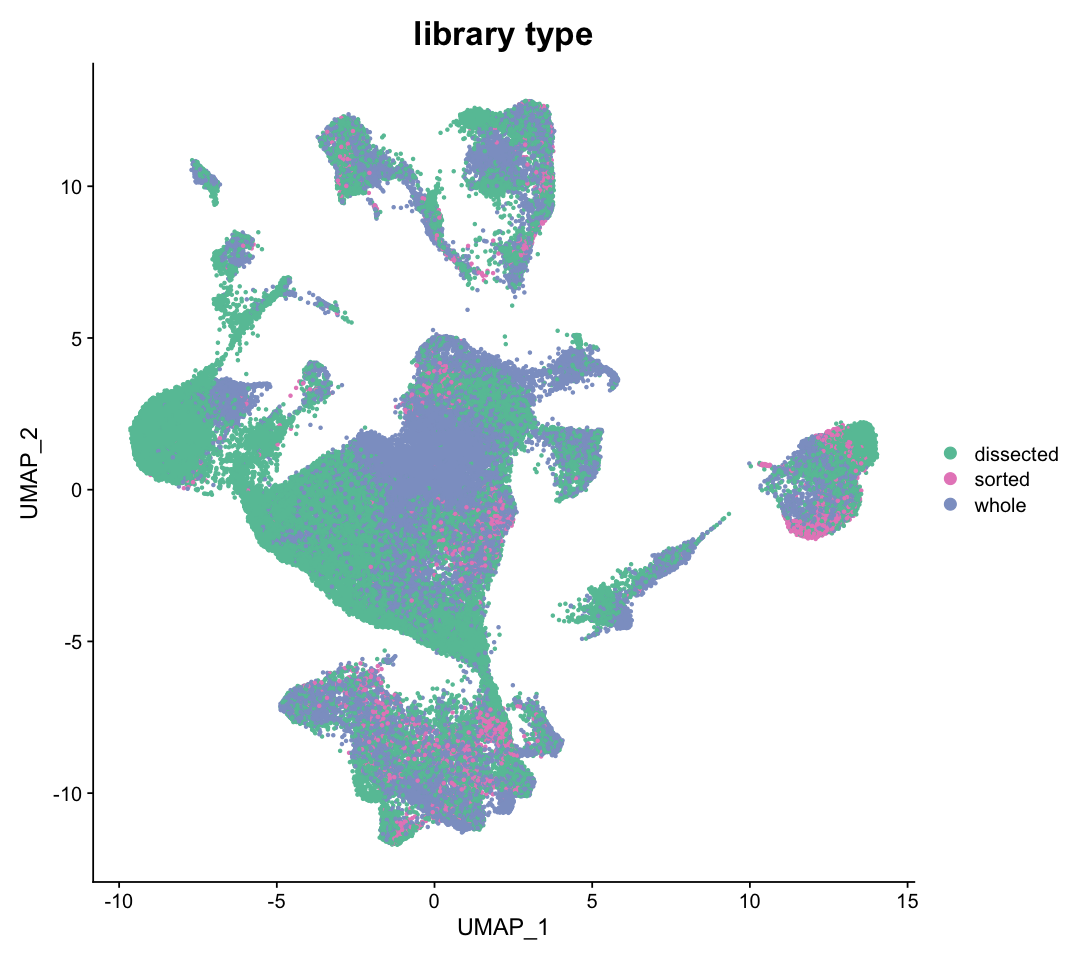

In [23]:
options(repr.plot.width=9, repr.plot.height=8)

umap_libtype <- DimPlot(object = brain_pool, reduction = 'umap', label = FALSE, cols = libtype_colors,
        pt.size = 0.6, raster = FALSE, shuffle = TRUE) + 
        labs(title = "library type") + theme(plot.title = element_text(size = 20, hjust = 0.5))
umap_libtype

In [24]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_umap_library_type.pdf",
       plot = umap_libtype, units = "in", height = 6, width = 7)

### Marker gene representation

#### Multiple markers - DotPlot/VlnPlot

In [6]:
# old version: plot markers with DotPlot

In [7]:
markers_major_celltypes <- c("snap25a", "snap25b","elavl3","elavl4", "tubb5", "sv2a", "nrgna", "gad2",  
                             "fabp7a", "her4.1", "s100b", "id1", "cx43", "glula",
                             "olig2", "mpz", "sox10","cd59",
                             "cd74a", "cd74b","pfn1", "apoeb",
                             "epd", "rbp4", "cp", "clu",
                             "hbba1", "cahz", 
                             "vim", "krt8",
                             "lyve1b", "sox7")


In [7]:
# including only those that look good in vlnplot
markers_major_celltypes <- c("snap25a", "snap25b","elavl3","elavl4", "tubb5", "sv2a", "nrgna", "gad2",  
                             "fabp7a", "her4.1", "s100b", "id1", "cx43", "glula",
                             "olig2", "mpz", "cd59",
                             "cd74a", "cd74b","pfn1", 
                             "epd", "rbp4", "cp", "clu",
                             "hbba1", "cahz", 
                             "vim", "krt8",
                             "lyve1b", "sox7")


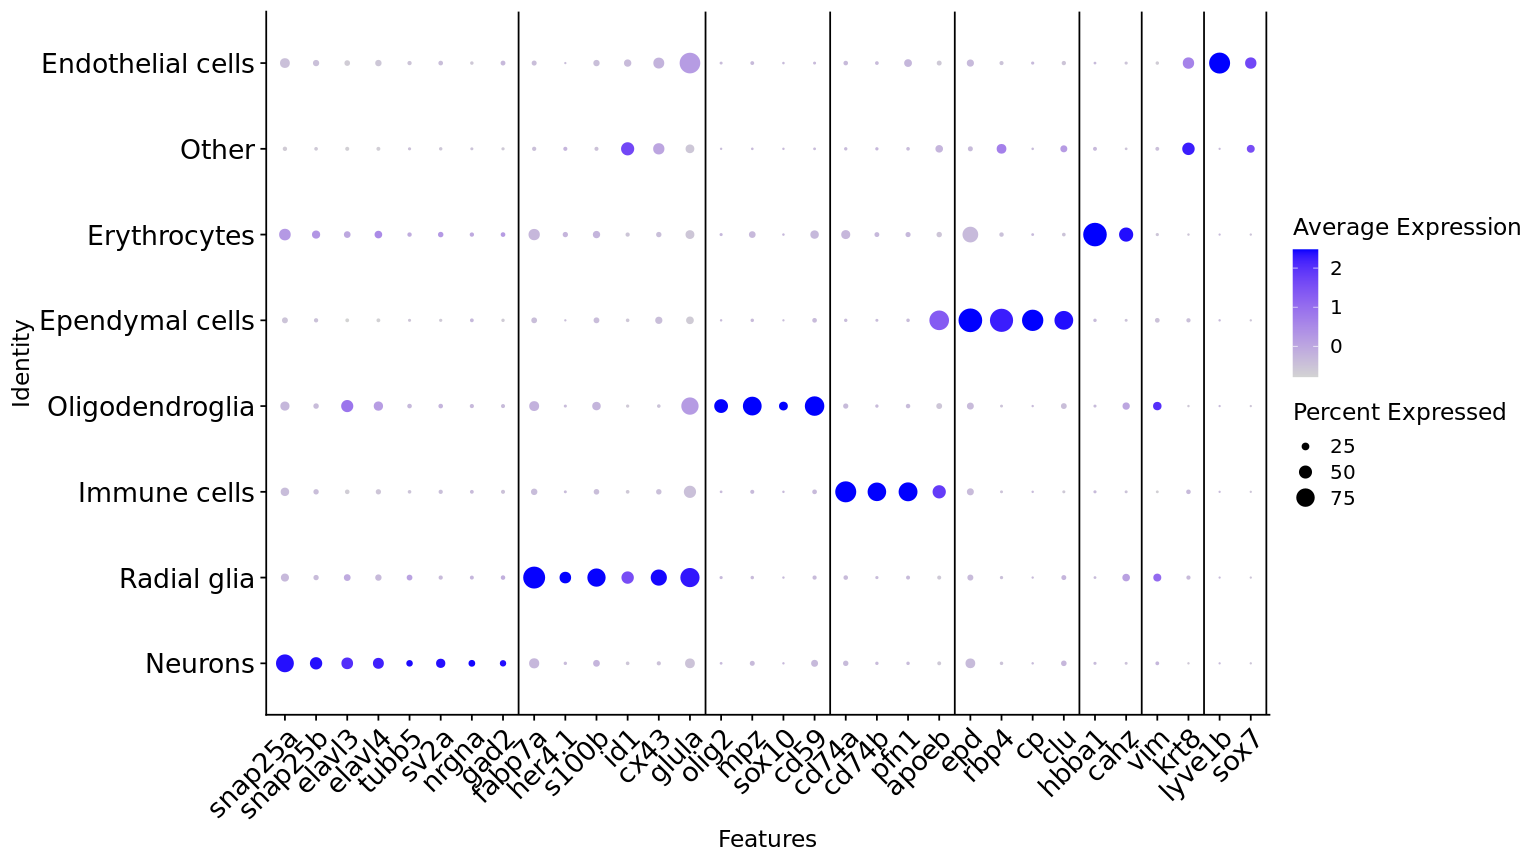

In [8]:
options(repr.plot.width=12.8, repr.plot.height=7.2)

dotplot <- DotPlot(brain_pool, features = markers_major_celltypes) + theme(axis.text.x = element_text(angle = 45, size = 16, hjust = 1, vjust = 1), axis.text.y = element_text(size = 16)) + RotatedAxis() + geom_vline(xintercept = c(8.5, 14.5, 18.5, 22.5, 26.5, 28.5, 30.5, 32.5))
dotplot

In [40]:
# now I'm considering a different representation of gene expression for main figure - try stacked violin plot 
mct_markers_multiple <- c("snap25a", "snap25b","elavl3","elavl4", # Neurons  
                             "fabp7a", "her4.1", "s100b", "id1", # RG
                             "cd74a", "cd74b","pfn1", "apoeb", # Immune
                            "olig2", "mpz", "sox10","cd59", # OGD
                             "epd", "rbp4", "cp", # Ependymal
                             "hbba1", "cahz", # Erythrocytes
                             "lyve1b", "sox7" # Endothelial
                         )



In [52]:
# including only those that look good in vlnplot
mct_markers_multiple <- c("snap25a", "snap25b","elavl3","elavl4", # Neurons  
                             "fabp7a", "her4.1", "s100b", "id1", # RG
                             "cd74a", "cd74b","pfn1",  # Immune
                            "olig2", "mpz", "cd59", # OGD
                             "epd", "rbp4", "cp", # Ependymal
                             "hbba1", "cahz", # Erythrocytes
                             "lyve1b", "sox7" # Endothelial
                         )

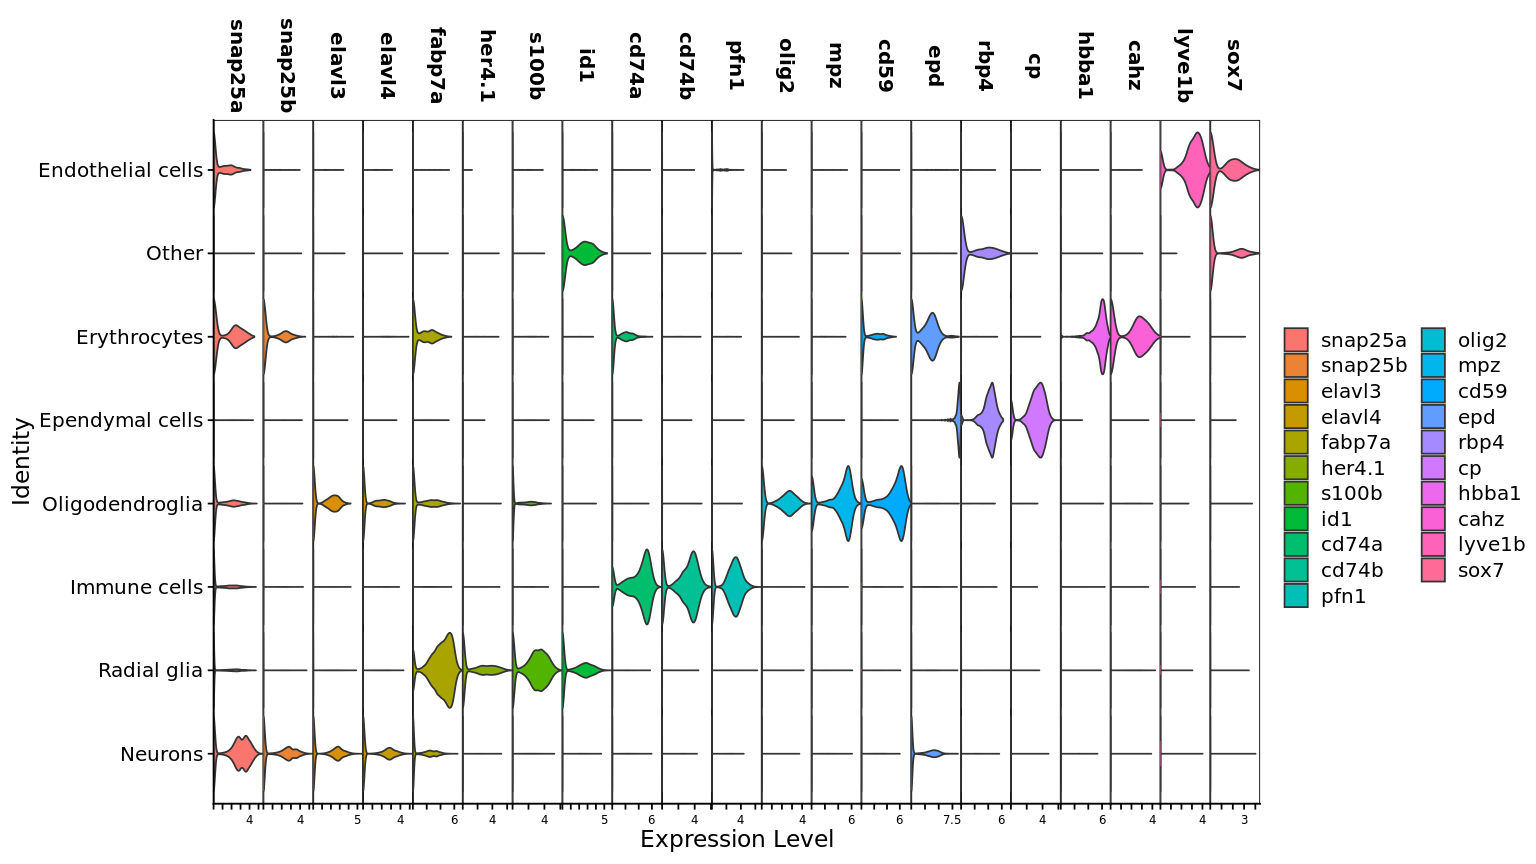

In [53]:
VlnPlot(brain_pool, features = mct_markers_multiple, stack = TRUE)
# roughly what I want but Seurat does not offer enough customization

In [54]:
# suggestions for how to make a more customizable plot with ggplot package
# https://github.com/ycl6/StackedVlnPlot

In [55]:
features <- mct_markers_multiple
identity <- Idents(brain_pool)
brain_pool_df <- FetchData(brain_pool, features, slot = "data")

In [56]:
# Add cell ID and identity classes
brain_pool_df$Cell <- rownames(brain_pool_df)
brain_pool_df$Idents <- identity

# Use melt to change data.frame format
brain_pool_dfm <- reshape2::melt(brain_pool_df, id.vars = c("Cell","Idents"), measure.vars = features,
                       variable.name = "Feat", value.name = "Expr")
head(brain_pool_dfm, 10)

Cell                  Idents       Feat    Expr    
1  B1.T_AAACATTGGAGCTT-1 Radial glia  snap25a 0.000000
2  B1.T_AAACGGCTTTCCAT-1 Immune cells snap25a 0.000000
3  B1.T_AAAGAGACGGATTC-1 Neurons      snap25a 2.253688
4  B1.T_AAAGAGACTAGACC-1 Neurons      snap25a 2.608292
5  B1.T_AAAGAGACTCTACT-1 Neurons      snap25a 0.000000
6  B1.T_AAAGATCTGTTCTT-1 Immune cells snap25a 0.000000
7  B1.T_AAAGCAGAGCGATT-1 Radial glia  snap25a 0.000000
8  B1.T_AAAGGCCTAGATCC-1 Neurons      snap25a 2.146637
9  B1.T_AAATACTGGAATAG-1 Neurons      snap25a 1.623572
10 B1.T_AAATACTGGTTGCA-1 Radial glia  snap25a 0.000000

In [57]:
vln1 <- ggplot(brain_pool_dfm, aes(factor(Idents), Expr, fill = Feat)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_y_continuous(expand = c(0, 0), position="right", labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(rows = vars(Feat), scales = "free", switch = "y") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold"),
              strip.text.y.left = element_text(angle = 0)) +
         xlab("Identity") + ylab("Expression Level")

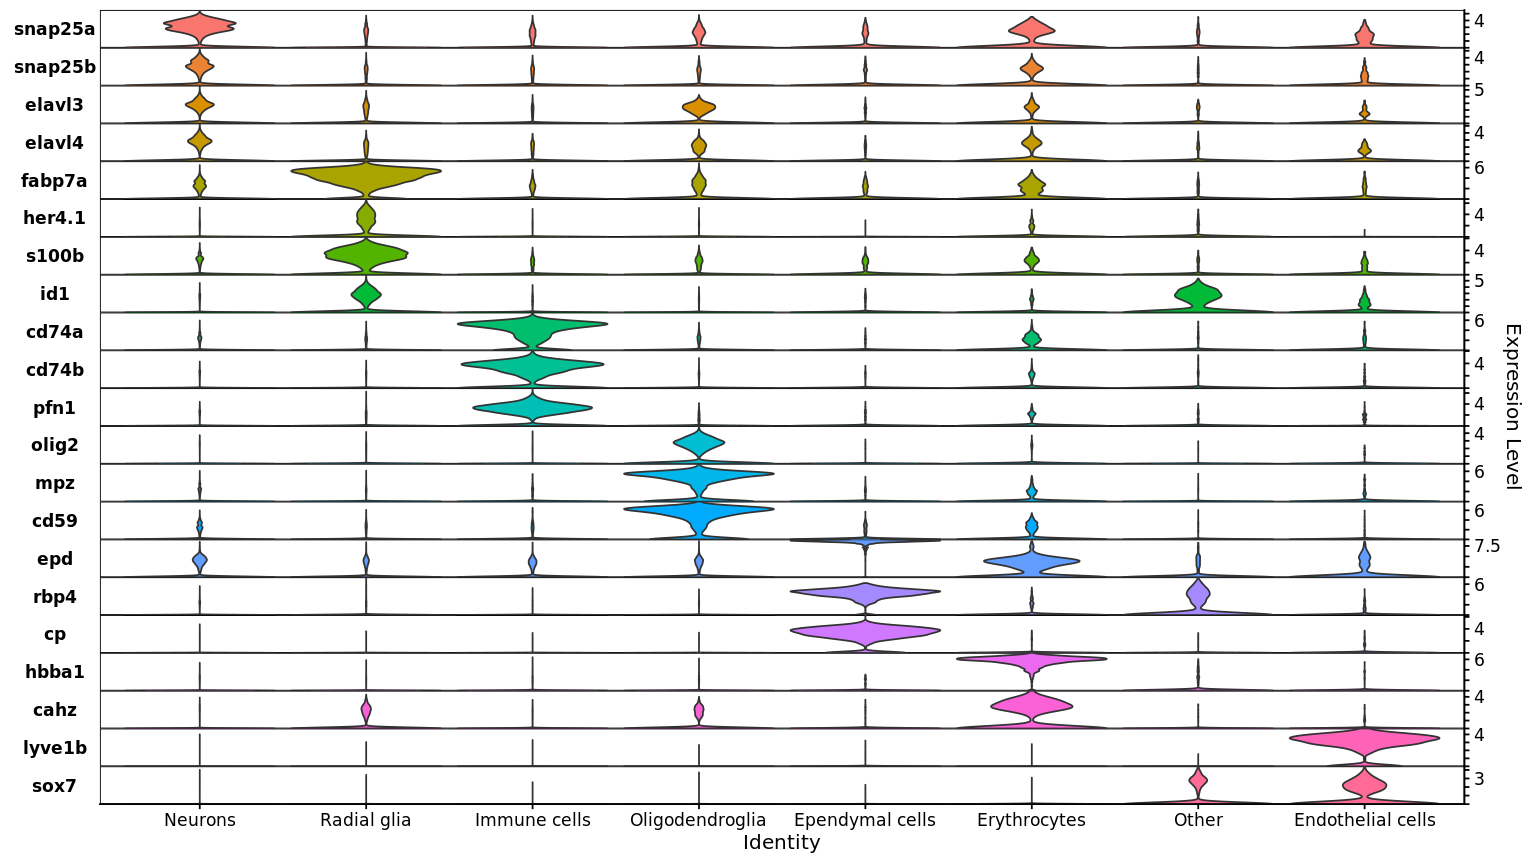

In [58]:
vln1

In [59]:
vln2 <- ggplot(brain_pool_dfm, aes(factor(Feat), Expr, fill = Idents)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_fill_manual(values = mct_colors) +
        scale_y_continuous(expand = c(0, 0), position="right", labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(rows = vars(Idents), scales = "free", switch = "y") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold"),
              strip.text.y.left = element_text(angle = 0),
              axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5)) +
        xlab("Feature") + ylab("Expression Level")


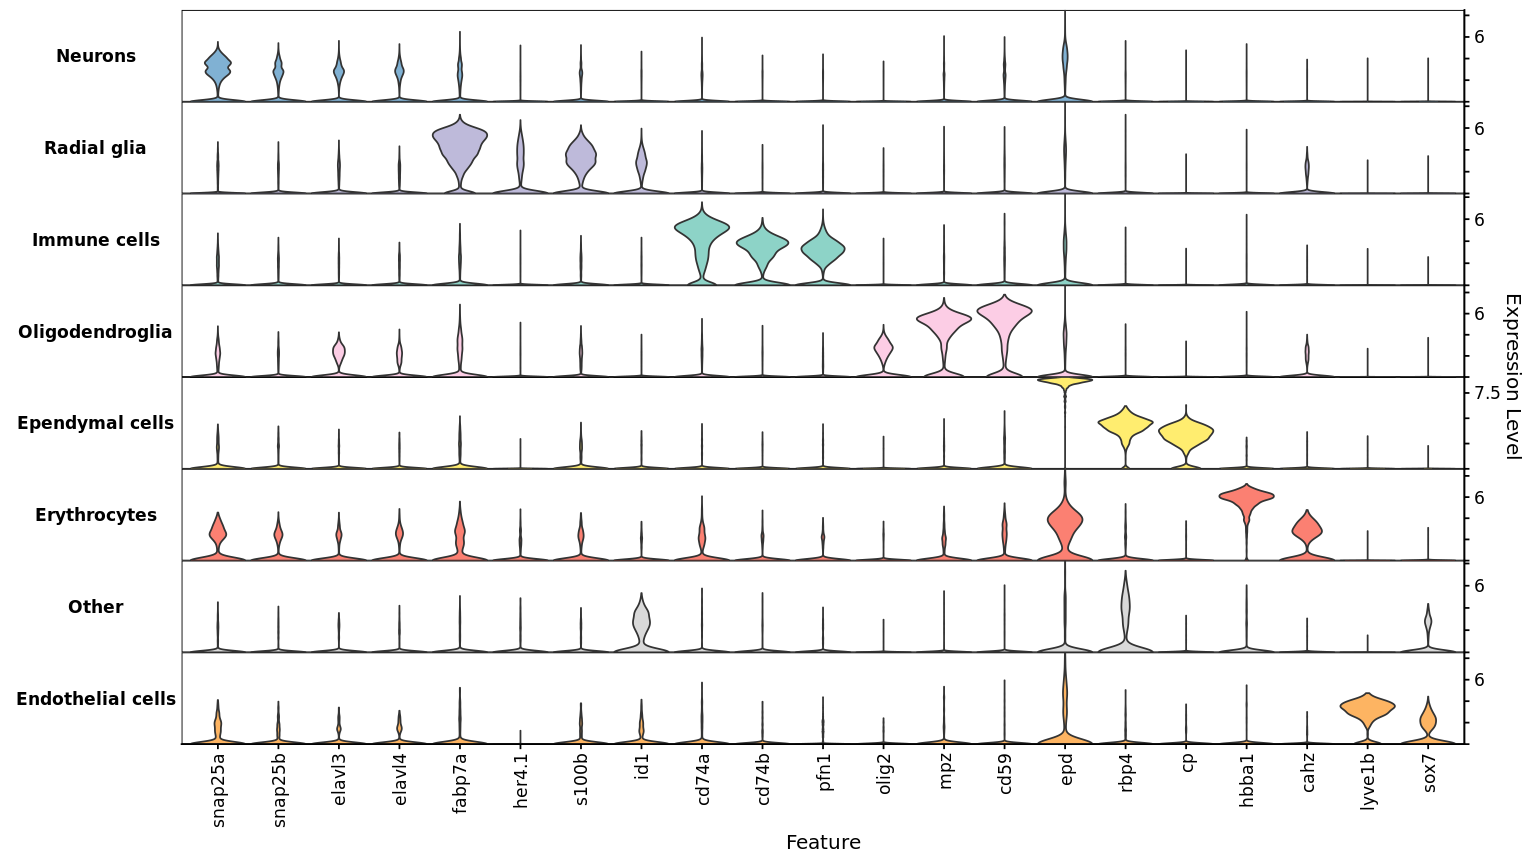

In [60]:
vln2

In [61]:
vln3 <- ggplot(brain_pool_dfm, aes(Expr, factor(Feat), fill = Idents)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_fill_manual(values = mct_colors) +
        scale_x_continuous(expand = c(0, 0), 
                           labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(cols = vars(Idents), scales = "free") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold")) +
        xlab("Expression Level") + ylab("Feature")

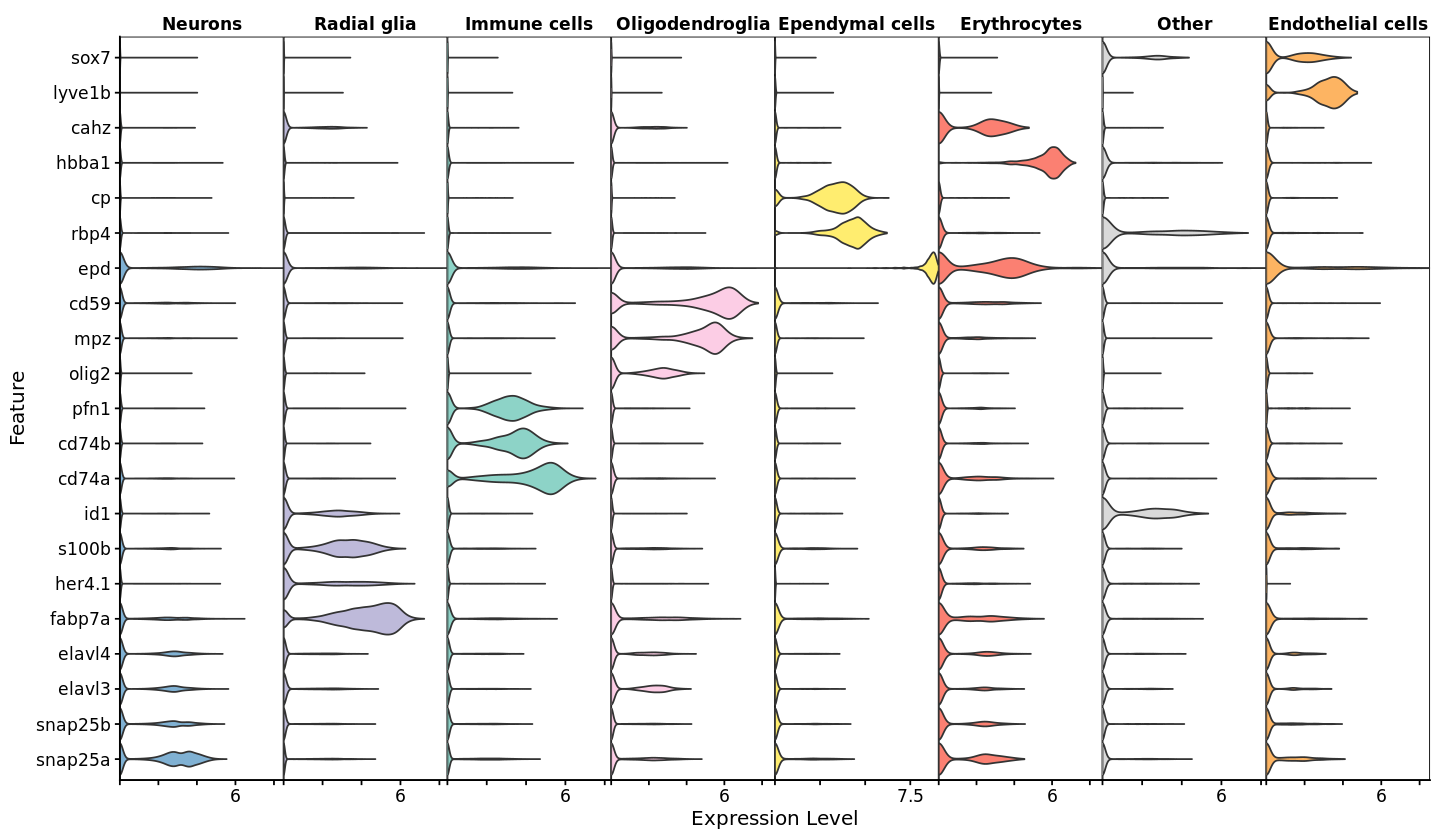

In [65]:
options(repr.plot.width=12, repr.plot.height=7)

vln3

In [95]:
#explore more specific marker for each cell group

neu_markers <- c("snap25a", "syt1a", "stx1b", "sncb", "atp1a3a", "nrxn1a", "pclob")

features <- neu_markers
identity <- Idents(brain_pool)
brain_pool_df <- FetchData(brain_pool, features, slot = "data")

# Add cell ID and identity classes
brain_pool_df$Cell <- rownames(brain_pool_df)
brain_pool_df$Idents <- identity

# Use melt to change data.frame format
brain_pool_dfm <- reshape2::melt(brain_pool_df, id.vars = c("Cell","Idents"), measure.vars = features,
                       variable.name = "Feat", value.name = "Expr")
head(brain_pool_dfm, 10)

Cell                  Idents       Feat    Expr    
1  B1.T_AAACATTGGAGCTT-1 Radial glia  snap25a 0.000000
2  B1.T_AAACGGCTTTCCAT-1 Immune cells snap25a 0.000000
3  B1.T_AAAGAGACGGATTC-1 Neurons      snap25a 2.253688
4  B1.T_AAAGAGACTAGACC-1 Neurons      snap25a 2.608292
5  B1.T_AAAGAGACTCTACT-1 Neurons      snap25a 0.000000
6  B1.T_AAAGATCTGTTCTT-1 Immune cells snap25a 0.000000
7  B1.T_AAAGCAGAGCGATT-1 Radial glia  snap25a 0.000000
8  B1.T_AAAGGCCTAGATCC-1 Neurons      snap25a 2.146637
9  B1.T_AAATACTGGAATAG-1 Neurons      snap25a 1.623572
10 B1.T_AAATACTGGTTGCA-1 Radial glia  snap25a 0.000000

In [96]:
vln_neu <- ggplot(brain_pool_dfm, aes(Expr, factor(Feat), fill = Idents)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_fill_manual(values = mct_colors) +
        scale_x_continuous(expand = c(0, 0), 
                           labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(cols = vars(Idents), scales = "free") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold")) +
        xlab("Expression Level") + ylab("Feature")

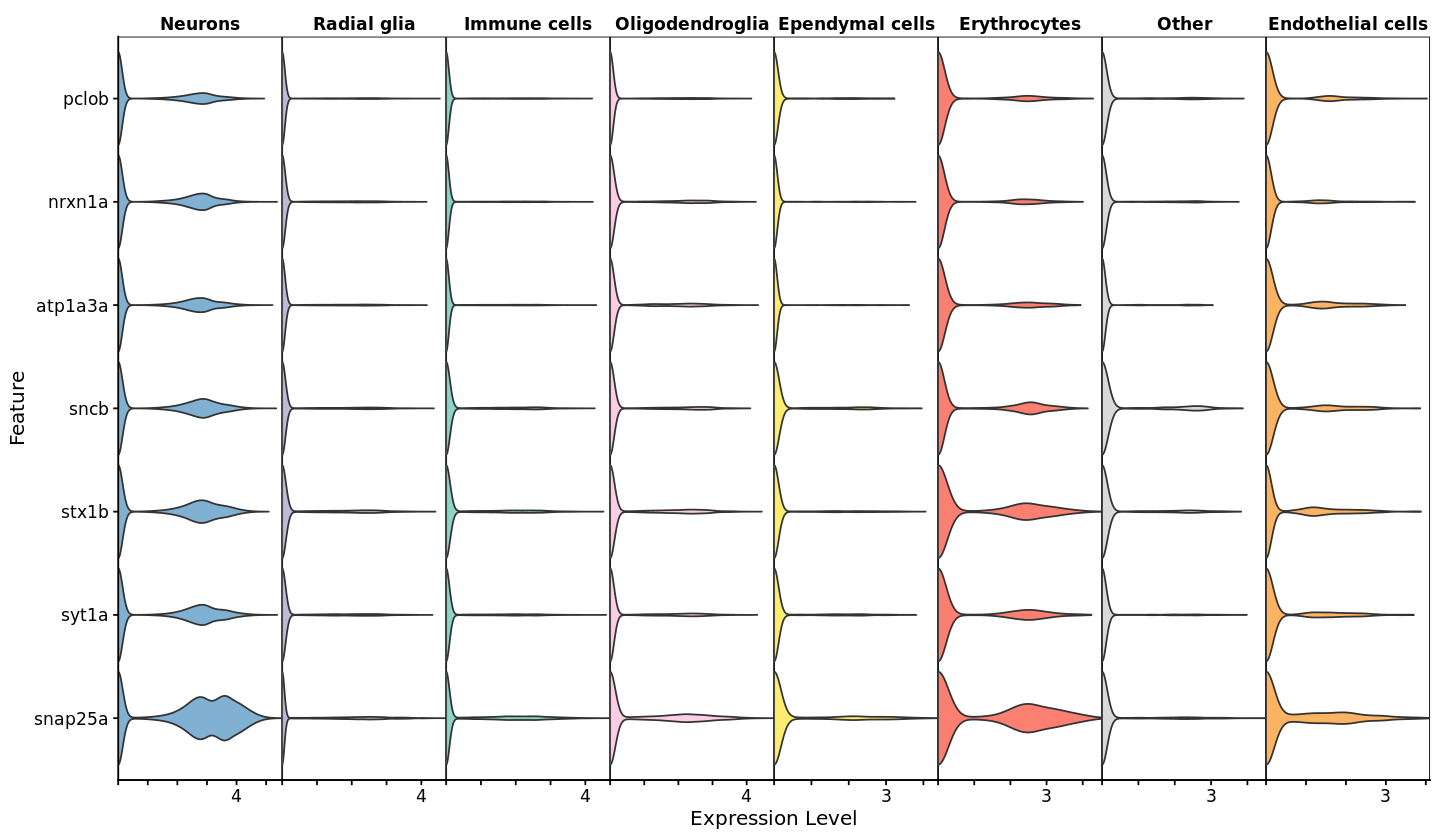

In [97]:
options(repr.plot.width=12, repr.plot.height=7)

vln_neu

In [98]:
#explore more specific marker for each cell group

rg_markers <- c("slc1a2b", "cx43", "fabp7a", "ptgdsb.2", "atp1a1b", "s100b", "mdka", "glula")

features <- rg_markers
identity <- Idents(brain_pool)
brain_pool_df <- FetchData(brain_pool, features, slot = "data")

# Add cell ID and identity classes
brain_pool_df$Cell <- rownames(brain_pool_df)
brain_pool_df$Idents <- identity

# Use melt to change data.frame format
brain_pool_dfm <- reshape2::melt(brain_pool_df, id.vars = c("Cell","Idents"), measure.vars = features,
                       variable.name = "Feat", value.name = "Expr")
head(brain_pool_dfm, 10)

Cell                  Idents       Feat    Expr    
1  B1.T_AAACATTGGAGCTT-1 Radial glia  slc1a2b 3.848677
2  B1.T_AAACGGCTTTCCAT-1 Immune cells slc1a2b 0.000000
3  B1.T_AAAGAGACGGATTC-1 Neurons      slc1a2b 0.000000
4  B1.T_AAAGAGACTAGACC-1 Neurons      slc1a2b 0.000000
5  B1.T_AAAGAGACTCTACT-1 Neurons      slc1a2b 0.000000
6  B1.T_AAAGATCTGTTCTT-1 Immune cells slc1a2b 0.000000
7  B1.T_AAAGCAGAGCGATT-1 Radial glia  slc1a2b 2.575713
8  B1.T_AAAGGCCTAGATCC-1 Neurons      slc1a2b 0.000000
9  B1.T_AAATACTGGAATAG-1 Neurons      slc1a2b 0.000000
10 B1.T_AAATACTGGTTGCA-1 Radial glia  slc1a2b 0.000000

In [99]:
vln_rg <- ggplot(brain_pool_dfm, aes(Expr, factor(Feat), fill = Idents)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_fill_manual(values = mct_colors) +
        scale_x_continuous(expand = c(0, 0), 
                           labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(cols = vars(Idents), scales = "free") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold")) +
        xlab("Expression Level") + ylab("Feature")

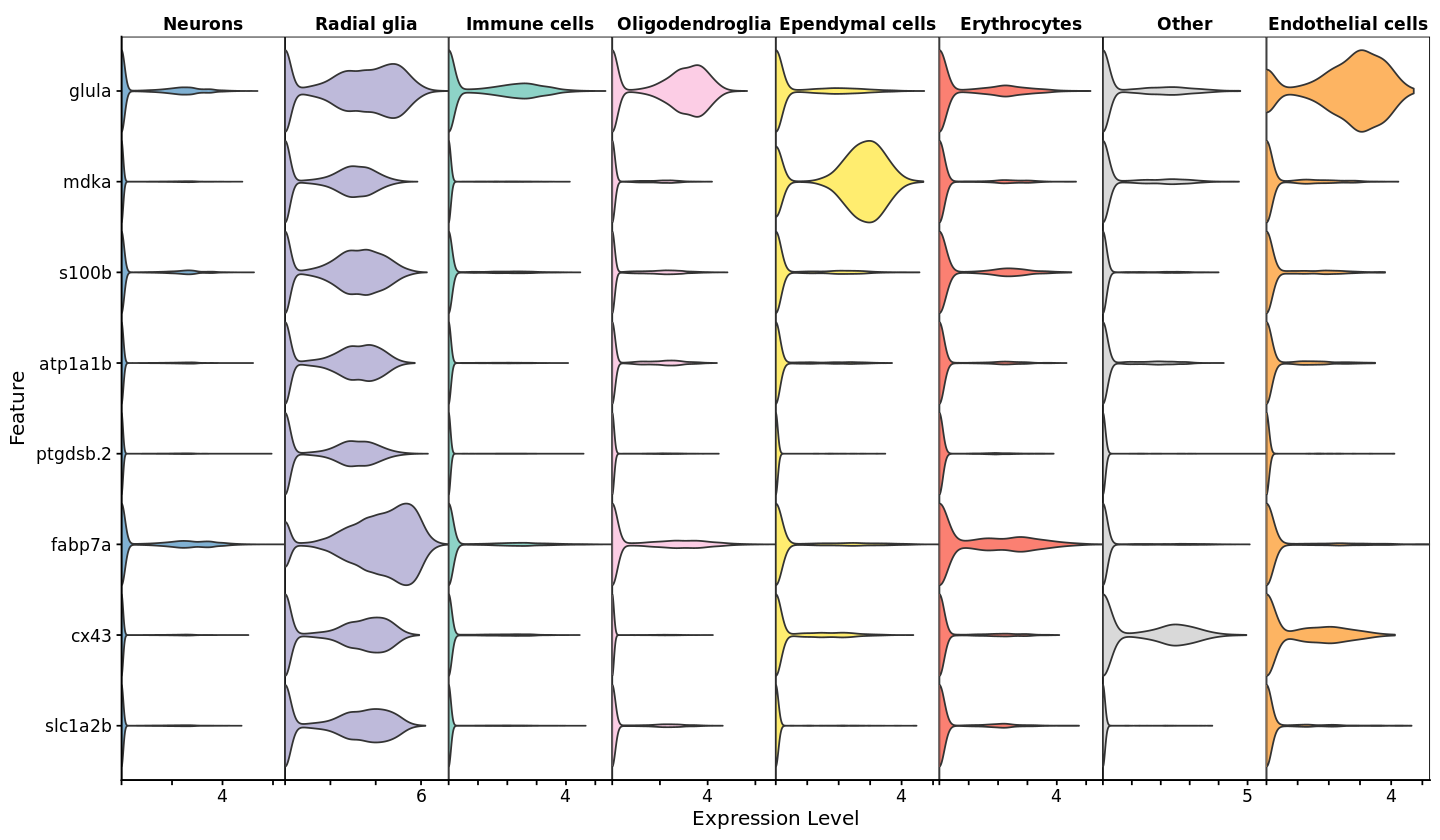

In [100]:
options(repr.plot.width=12, repr.plot.height=7)

vln_rg

#### Vln Plot update

In [48]:
Idents(brain_pool) <- "major_celltypes_pc28_res0.6"

In [49]:
# including only those that look good in vlnplot
mct_markers_multiple <- c("snap25a", "snap25b", "syt1a", "stx1b",  # Neurons, also possible but weaker marker "syncb" 
                             "fabp7a", "s100b", "cx43",  # RG, also possible but weaker marker "id1"
                             "cd74a", "cd74b","pfn1",  # Immune
                            "olig2", "mpz", "cd59", # OGD
                             "epd", "rbp4", "cp", # Ependymal
                             "hbba1", "cahz", # Erythrocytes
                             "krt18", "krt8", #Epithelial(-like) 
                             "lyve1b", "sox7" # Endothelial
                         )

In [50]:
features <- mct_markers_multiple
identity <- Idents(brain_pool)
brain_pool_df <- FetchData(brain_pool, features, slot = "data")

In [51]:
head(brain_pool_df)

snap25a  snap25b  syt1a    stx1b    fabp7a   s100b
B1.T_AAACATTGGAGCTT-1 0.000000 0.000000 0.000000 0.000000 6.569096 0    
B1.T_AAACGGCTTTCCAT-1 0.000000 0.000000 0.000000 0.000000 0.000000 0    
B1.T_AAAGAGACGGATTC-1 2.253688 3.970076 1.126365 1.126392 2.206463 0    
B1.T_AAAGAGACTAGACC-1 2.608292 3.549226 0.000000 0.000000 1.229381 0    
B1.T_AAAGAGACTCTACT-1 0.000000 0.000000 0.000000 2.713410 0.000000 0    
B1.T_AAAGATCTGTTCTT-1 0.000000 0.000000 0.000000 0.000000 0.000000 0    
                      cx43     cd74a    cd74b    pfn1     ⋯ cd59 epd rbp4 cp
B1.T_AAACATTGGAGCTT-1 3.175991 0.000000 0.000000 0.000000 ⋯ 0    0   0    0 
B1.T_AAACGGCTTTCCAT-1 0.000000 0.000000 2.116091 4.709268 ⋯ 0    0   0    0 
B1.T_AAAGAGACGGATTC-1 0.000000 0.000000 0.000000 0.000000 ⋯ 0    0   0    0 
B1.T_AAAGAGACTAGACC-1 0.000000 0.000000 0.000000 0.000000 ⋯ 0    0   0    0 
B1.T_AAAGAGACTCTACT-1 0.000000 0.000000 0.000000 0.000000 ⋯ 0    0   0    0 
B1.T_AAAGATCTGTTCTT-1 0.000000 5.724453 4.689054 5.599727 ⋯ 0    0   0    0 
                      hbba1 cahz     krt18 krt8 lyve1b sox7
B1.T_AAACATTGGAGCTT-1 0     3.176168 0     0    0      0   
B1.T_AAACGGCTTTCCAT-1 0     0.000000 0     0    0      0   
B1.T_AAAGAGACGGATTC-1 0     0.000000 0     0    0      0   
B1.T_AAAGAGACTAGACC-1 0     0.000000 0     0    0      0   
B1.T_AAAGAGACTCTACT-1 0     0.000000 0     0    0      0   
B1.T_AAAGATCTGTTCTT-1 0     0.000000 0     0    0      0

In [52]:
dim(brain_pool_df)

[1] 107598     22

In [53]:
class(brain_pool_df)

[1] "data.frame"

In [54]:
# Add cell ID and identity classes
brain_pool_df$Cell <- rownames(brain_pool_df)
brain_pool_df$Idents <- identity

# Use melt to change data.frame format
brain_pool_dfm <- reshape2::melt(brain_pool_df, id.vars = c("Cell","Idents"), measure.vars = features,
                       variable.name = "Feat", value.name = "Expr")
head(brain_pool_dfm, 10)

Cell                  Idents       Feat    Expr    
1  B1.T_AAACATTGGAGCTT-1 Radial glia  snap25a 0.000000
2  B1.T_AAACGGCTTTCCAT-1 Immune cells snap25a 0.000000
3  B1.T_AAAGAGACGGATTC-1 Neurons      snap25a 2.253688
4  B1.T_AAAGAGACTAGACC-1 Neurons      snap25a 2.608292
5  B1.T_AAAGAGACTCTACT-1 Neurons      snap25a 0.000000
6  B1.T_AAAGATCTGTTCTT-1 Immune cells snap25a 0.000000
7  B1.T_AAAGCAGAGCGATT-1 Radial glia  snap25a 0.000000
8  B1.T_AAAGGCCTAGATCC-1 Neurons      snap25a 2.146637
9  B1.T_AAATACTGGAATAG-1 Neurons      snap25a 1.623572
10 B1.T_AAATACTGGTTGCA-1 Radial glia  snap25a 0.000000

In [55]:
vln3 <- ggplot(brain_pool_dfm, aes(Expr, factor(Feat), fill = Idents)) +
        geom_violin(scale = "width", adjust = 1, trim = TRUE) +
        scale_fill_manual(values = mct_colors) +
        scale_x_continuous(expand = c(0, 0), 
                           labels = function(x)
                           c(rep(x = "", times = length(x)-2), x[length(x) - 1], "")) +
        facet_grid(cols = vars(Idents), scales = "free") +
        theme_cowplot(font_size = 12) +
        theme(legend.position = "none", panel.spacing = unit(0, "lines"),
          plot.title = element_text(hjust = 0.5),
              panel.background = element_rect(fill = NA, color = "black"),
              strip.background = element_blank(),
              strip.text = element_text(face = "bold")) +
        xlab("Expression Level") + ylab("Feature")

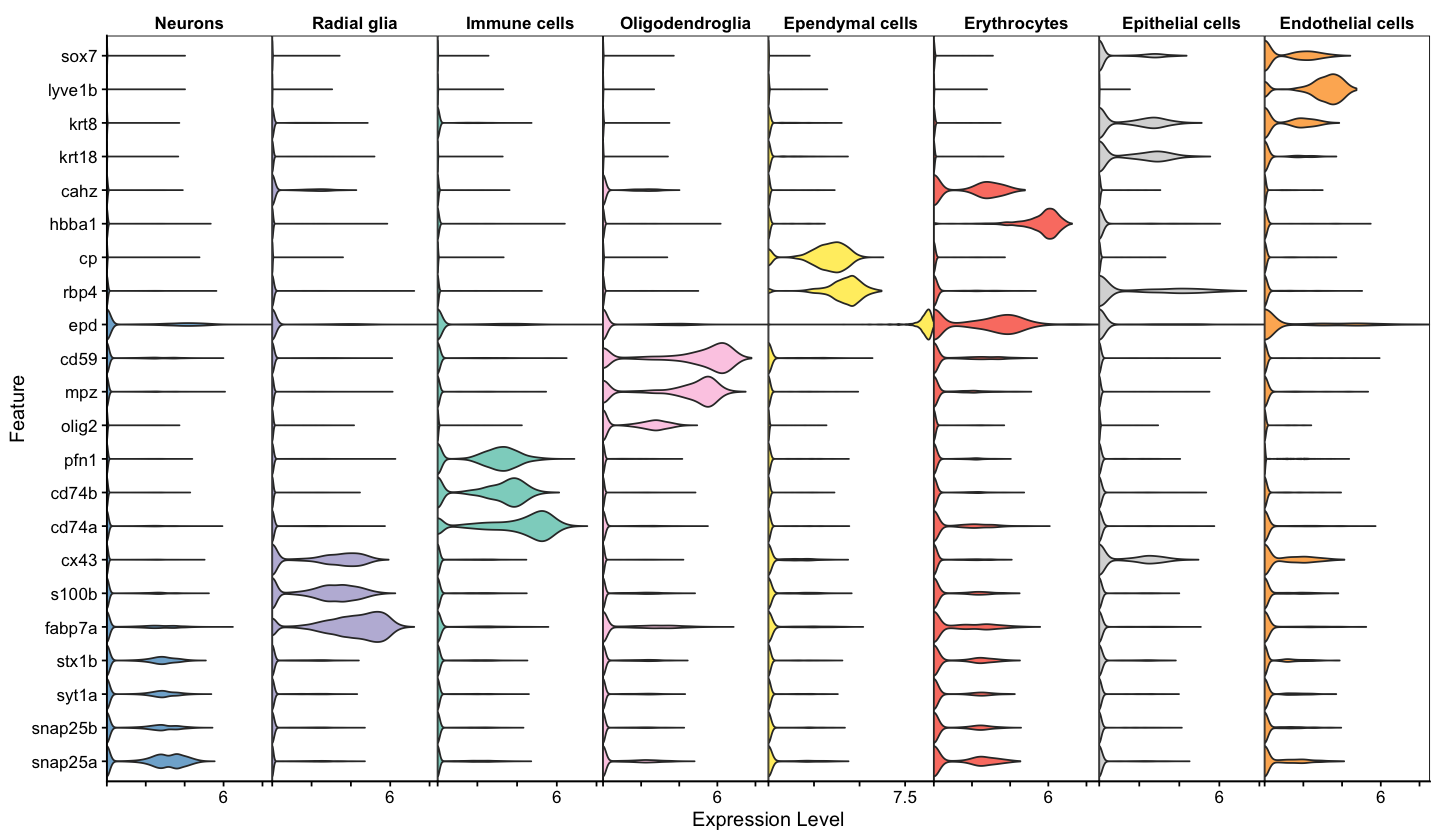

In [56]:
options(repr.plot.width=12, repr.plot.height=7)

vln3

In [30]:
#save figure pdf
#ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_vln_stacked.pdf",
       plot = vln3, units = "in", height = 7, width = 12)

#### Feature Plot

In [3]:
# main marker per group for feature plot
mct_markers_single <- c("snap25a", # Neurons  
                             "fabp7a",  # RG
                             "cd74a",  # Immune
                            "olig2",  # OGD
                             "epd",  # Ependymal
                             "hbba1", # Erythrocytes
                             "krt18", #Epithelial(-like)
                             "lyve1b" # Endothelial
                         )

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



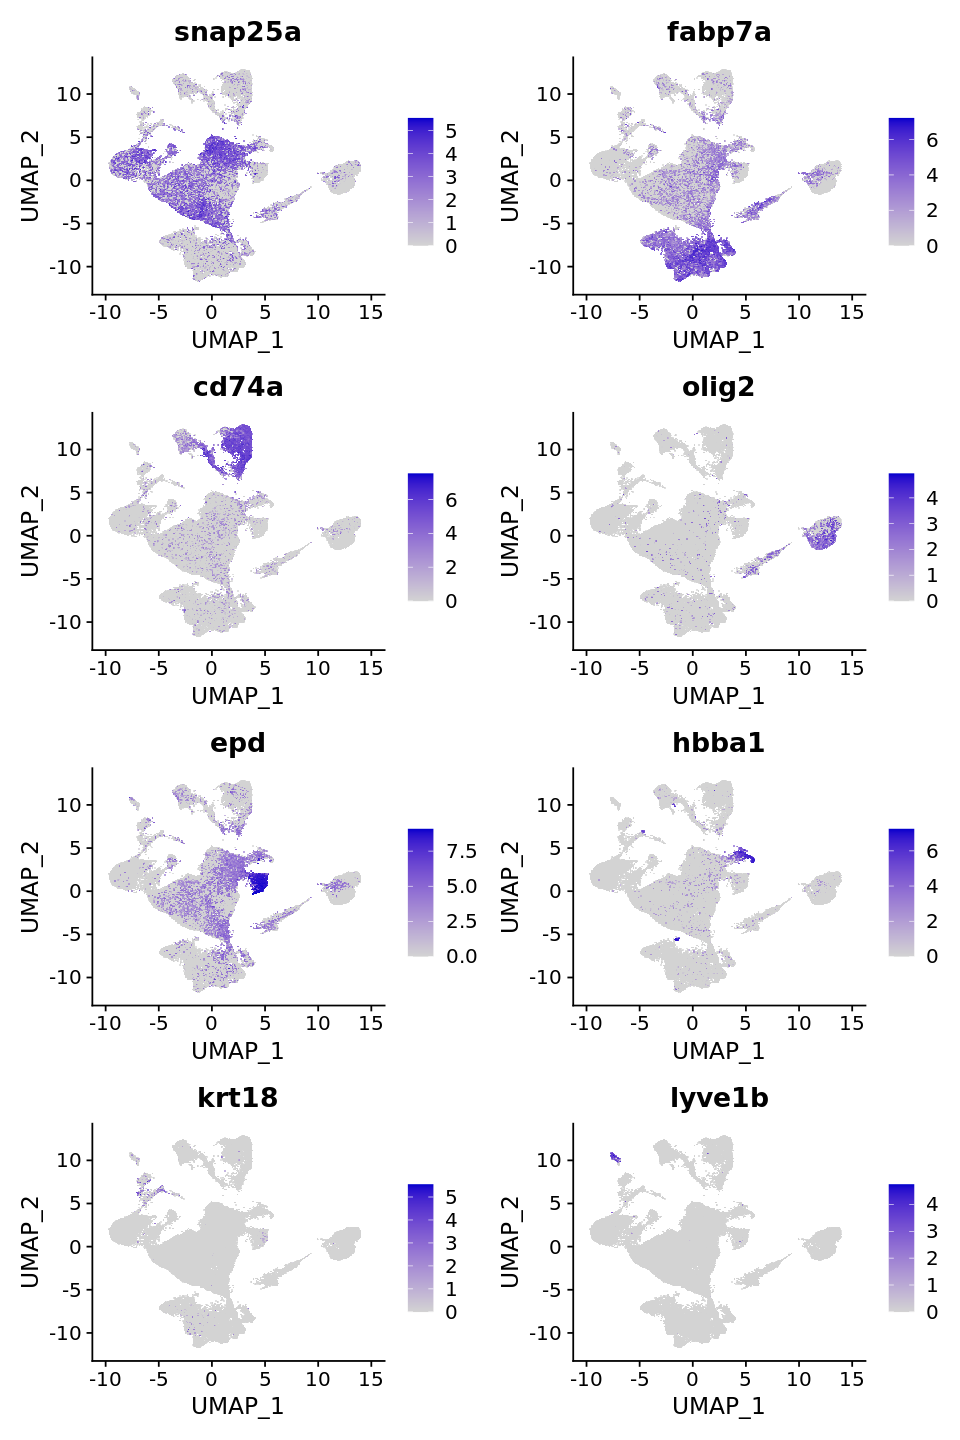

In [32]:
options(repr.plot.width=8, repr.plot.height=12)

fp_markers <- FeaturePlot(object = brain_pool, reduction = 'umap', features = mct_markers_single, ncol = 2, cols = c("lightgrey","mediumblue"),
           raster = TRUE)
fp_markers

In [33]:
#save figure png
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_fp_markers.png",
       plot = fp_markers, units = "in", height = 12, width = 8)

In [34]:
#save figure pdf
# for this probably better to do without rasterizing??
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_fp_markers.pdf",
       plot = fp_markers, units = "in", height = 12, width = 8)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



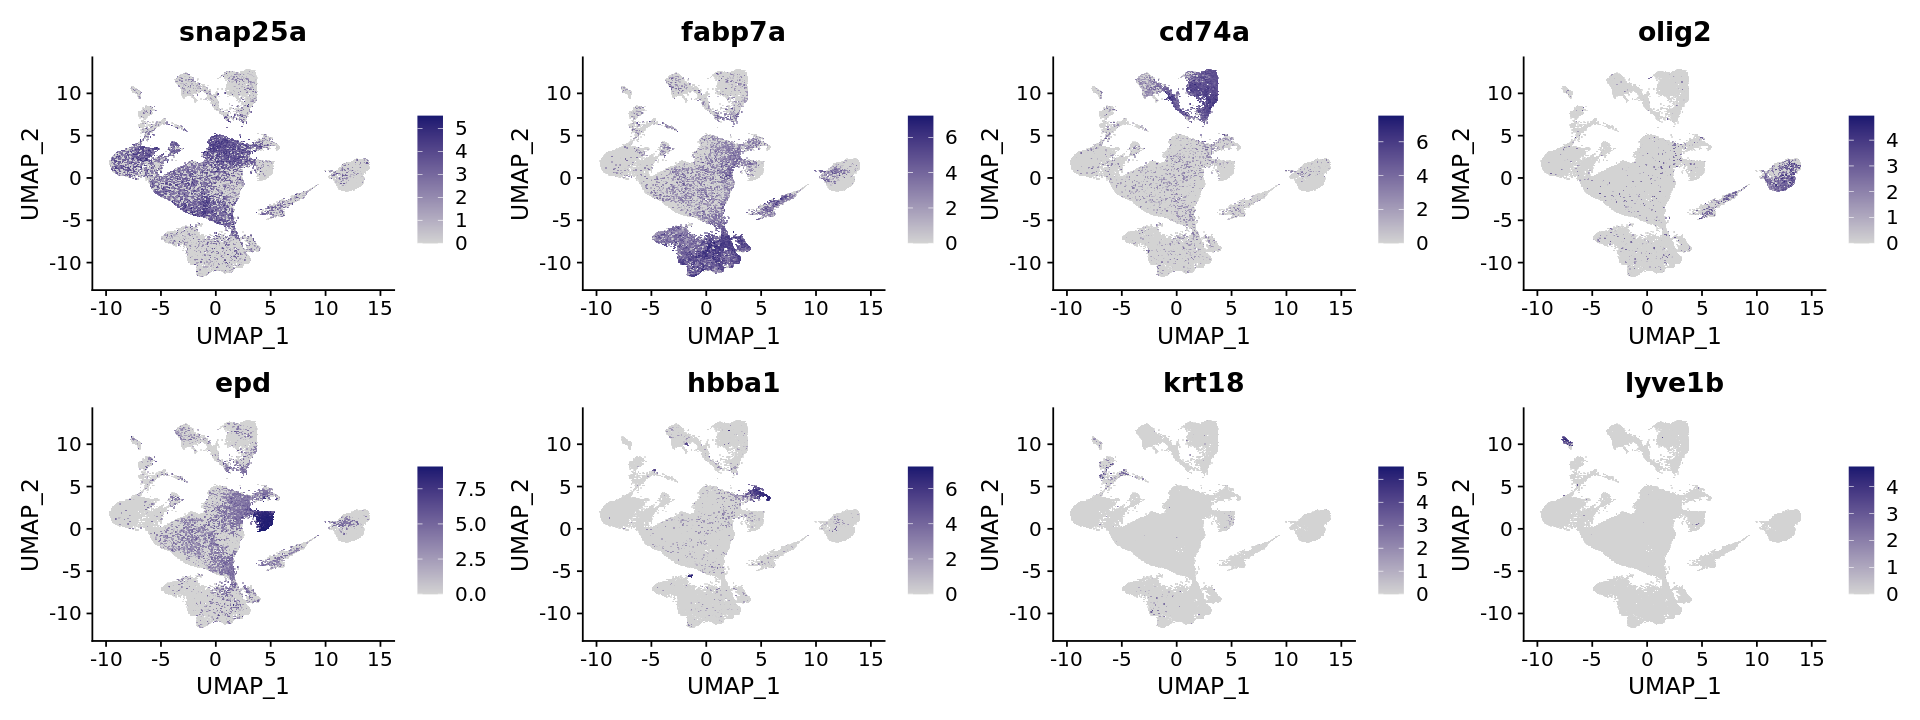

In [5]:
options(repr.plot.width=16, repr.plot.height=6)

#plot horizontal version for new Fig1 layout
#darker color

fp_markers_hor <- FeaturePlot(object = brain_pool, reduction = 'umap', features = mct_markers_single, ncol = 4, cols = c("lightgrey","midnightblue"),
           raster = TRUE)
fp_markers_hor

In [6]:
#save figure png
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_fp_markers_hor.png",
       plot = fp_markers_hor, units = "in", height = 6, width = 16)

### Fraction of brain region per cell type

In [15]:
table(brain_pool$brain_reg)


 dien   mes  rhom   tel whole 
12901 15140 16886 13577 49094 

In [16]:
# pallette for brain regions based on https://colorbrewer2.org/#type=qualitative&scheme=Accent&n=5
reg_colors <- c("tel" = "#7fc97f", #green
                "dien" = "#beaed4", #purple
                "mes" = "#fdc086", #orange
                "rhom" = "#ffff99", #yellow
                "whole" = "#386cb0" #blue
                )

In [17]:
brain.reg.by.celltype <- table(brain_pool$brain_reg, brain_pool$major_celltypes_pc28_res0.6)
brain.reg.by.celltype

       
        Neurons Radial glia Immune cells Oligodendroglia Ependymal cells
  dien     6566        1703         1676            2174             151
  mes      8309        2305         1261            2385             243
  rhom    13143        1297         1157             952             205
  tel      9872        1739          979             487             208
  whole   26692        9343         5161            4951             838
       
        Erythrocytes Epithelial cells Endothelial cells
  dien            97              500                34
  mes            103              358               176
  rhom            32               76                24
  tel             41              202                49
  whole         1302              388               419

In [18]:
#margin = 1 sums across rows (how is brain reg distributed over celltypes)
brain.reg.by.celltype.perc1 <- round(prop.table(brain.reg.by.celltype, margin = 1), digits = 10) * 100
brain.reg.by.celltype.perc1

       
           Neurons Radial glia Immune cells Oligodendroglia Ependymal cells
  dien  50.8952794  13.2005271   12.9912410      16.8514069       1.1704519
  mes   54.8811096  15.2245707    8.3289300      15.7529723       1.6050198
  rhom  77.8337084   7.6809191    6.8518299       5.6378065       1.2140235
  tel   72.7112028  12.8084260    7.2107240       3.5869485       1.5320026
  whole 54.3691693  19.0308388   10.5124863      10.0847354       1.7069296
       
        Erythrocytes Epithelial cells Endothelial cells
  dien     0.7518797        3.8756685         0.2635455
  mes      0.6803170        2.3645971         1.1624835
  rhom     0.1895061        0.4500770         0.1421296
  tel      0.3019813        1.4878103         0.3609045
  whole    2.6520552        0.7903206         0.8534648

In [19]:
#margin = 2 sums across columns (which brain regs make up each celltype) - this is what I need for celltype annotation
#use as input rowwise normalized data
brain.reg.by.celltype.perc2a <- as.data.frame(round(prop.table(brain.reg.by.celltype.perc1, margin = 2), digits = 10))
colnames(brain.reg.by.celltype.perc2a) <- c("Brain.reg", "Cell.type", "Fraction")
head(brain.reg.by.celltype.perc2a)

Brain.reg Cell.type   Fraction 
1 dien      Neurons     0.1638135
2 mes       Neurons     0.1766424
3 rhom      Neurons     0.2505185
4 tel       Neurons     0.2340310
5 whole     Neurons     0.1749946
6 dien      Radial glia 0.1942817

In [21]:
# 
options(repr.plot.width=10, repr.plot.height=12)

p_br <- ggplot(data = brain.reg.by.celltype.perc2a[which(brain.reg.by.celltype.perc2a$Brain.reg != "whole"),], aes(x = Cell.type, y = Fraction, fill = Brain.reg)) + 
    geom_bar(stat="identity", position = "fill") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cell type", y="Fraction", fill = "Brain region") +  
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 18), plot.title = element_text(size = 18, hjust = 0.5), legend.title = element_text(size = 18), legend.text = element_text(size = 16), legend.justification = "top")  + 
    coord_flip() + 
    scale_fill_manual(values = reg_colors, limits = c("tel", "dien", "mes", "rhom")) 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



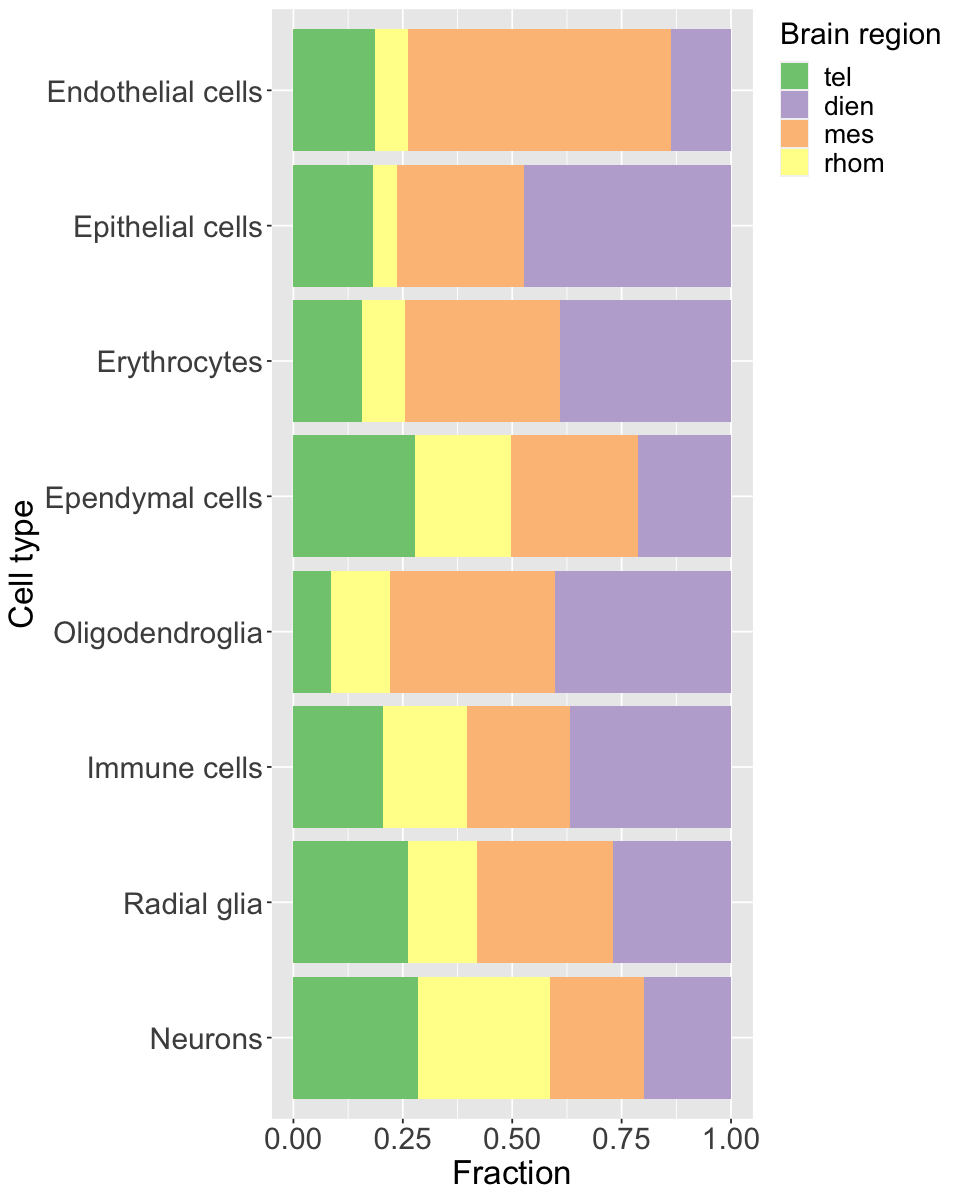

In [22]:
options(repr.plot.width=8, repr.plot.height=10)

p_br

In [72]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_barplot_regions.pdf",
       plot = p_br, units = "in", height = 10, width = 8)

Alternate version for manuscript: horizontal, remove background grid + tidy legend

In [34]:
p_br <- ggplot(data = brain.reg.by.celltype.perc2a[which(brain.reg.by.celltype.perc2a$Brain.reg != "whole"),], aes(x = Cell.type, y = Fraction, fill = Brain.reg)) + 
    geom_bar(stat="identity", position = "fill") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction", fill = "Brain region") +  
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 18), axis.text.x = element_text(angle = 45, hjust = 1), 
          legend.title = element_text(size = 20), legend.text = element_text(size = 18), legend.position = "top",
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white")) + 
    scale_fill_manual(values = reg_colors, 
                      breaks = c("tel", "dien", "mes", "rhom"),
                      labels = c("telencephalon", "diencephalon", "mesencephalon", "rhombencephalon")) 

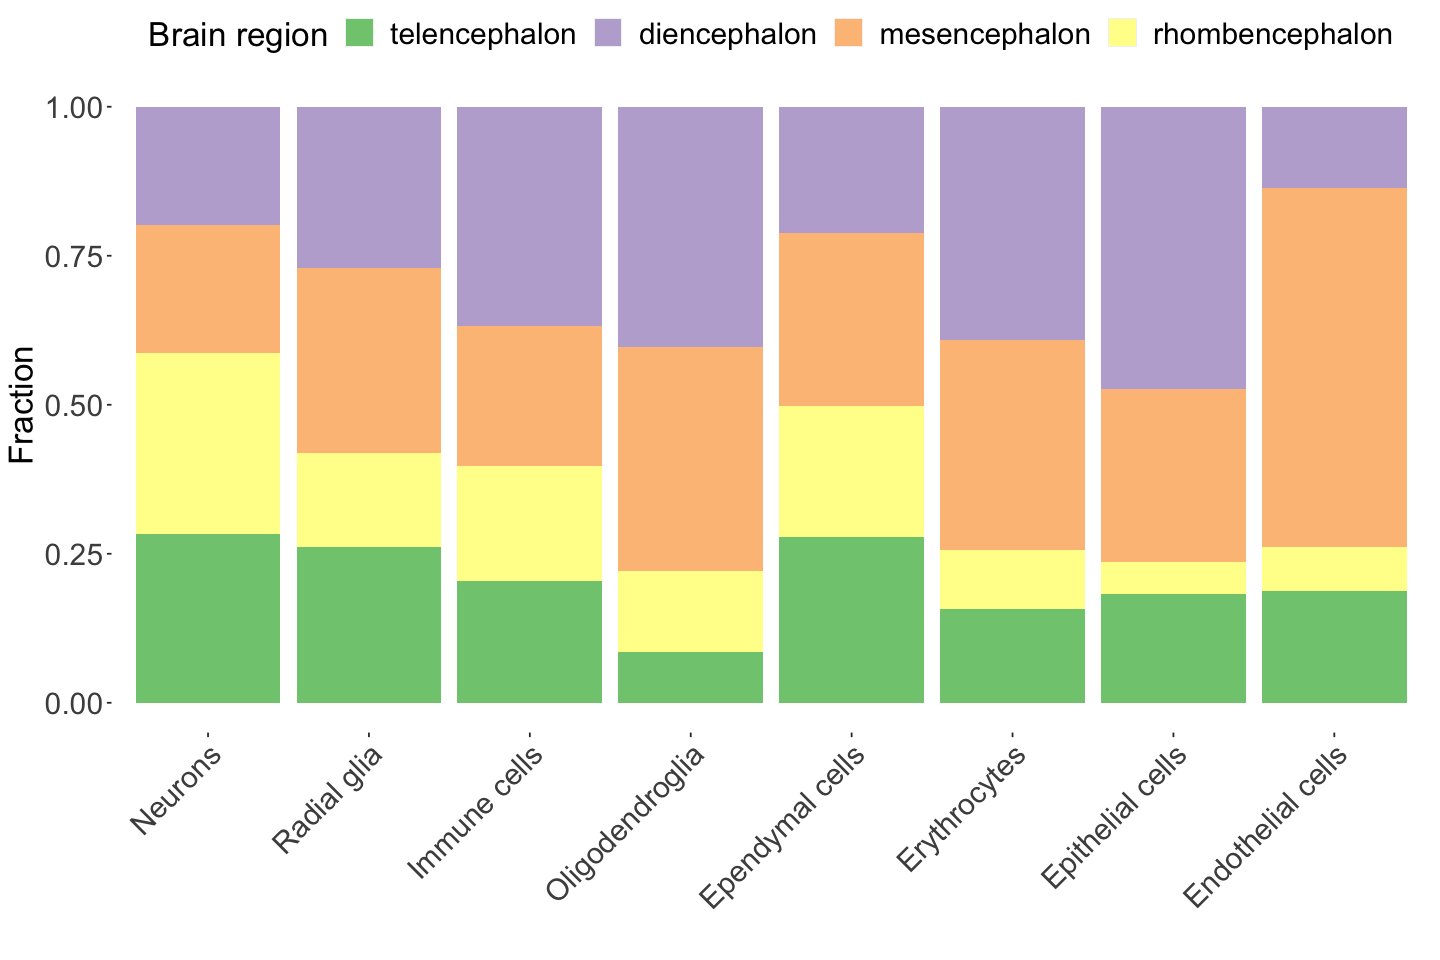

In [33]:
options(repr.plot.width=12, repr.plot.height=8)

p_br

In [37]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_barplot_regions.pdf",
       plot = p_br, units = "in", height = 8, width = 12)

### Fraction of library type per cell type

In [38]:
table(brain_pool$library_type)


dissected    sorted     whole 
    58504      5164     43930 

In [39]:
# pallette for library types based on https://colorbrewer2.org/#type=qualitative&scheme=Set2&n=5
libtype_colors <- c("dissected" = "#66c2a5", 
                "sorted" = "#e78ac3", 
                "whole" = "#8da0cb"
                )

In [40]:
lib.type.by.celltype <- table(brain_pool$library_type, brain_pool$major_celltypes_pc28_res0.6)
lib.type.by.celltype

           
            Neurons Radial glia Immune cells Oligodendroglia Ependymal cells
  dissected   37890        7044         5073            5998             807
  sorted       1390        1802          591            1370               4
  whole       25302        7541         4570            3581             834
           
            Erythrocytes Epithelial cells Endothelial cells
  dissected          273             1136               283
  sorted               0                5                 2
  whole             1302              383               417

In [41]:
#margibrain_pool$orig.idents rows (how is brain reg distributed over celltypes)
lib.type.by.celltype.perc1 <- round(prop.table(lib.type.by.celltype, margin = 1), digits = 10) * 100
lib.type.by.celltype.perc1

           
                Neurons Radial glia Immune cells Oligodendroglia
  dissected 64.76480241 12.04020238   8.67120197     10.25229044
  sorted    26.91711851 34.89542990  11.44461658     26.52982184
  whole     57.59617573 17.16594582  10.40291373      8.15160483
           
            Ependymal cells Erythrocytes Epithelial cells Endothelial cells
  dissected      1.37939286   0.46663476       1.94174757        0.48372761
  sorted         0.07745933   0.00000000       0.09682417        0.03872967
  whole          1.89847485   2.96380606       0.87184157        0.94923742

In [42]:
#margin = 2 sums across columns (which brain regs make up each celltype) - this is what I need for celltype annotation
#use as input rowwise normalized data
lib.type.by.celltype.perc2a <- as.data.frame(round(prop.table(lib.type.by.celltype.perc1, margin = 2), digits = 10))
colnames(lib.type.by.celltype.perc2a) <- c("Lib.type", "Cell.type", "Fraction")
lib.type.by.celltype.perc2a

Lib.type  Cell.type         Fraction  
1  dissected Neurons           0.43385335
2  sorted    Neurons           0.18031526
3  whole     Neurons           0.38583139
4  dissected Radial glia       0.18783005
5  sorted    Radial glia       0.54437708
6  whole     Radial glia       0.26779287
7  dissected Immune cells      0.28412720
8  sorted    Immune cells      0.37500301
9  whole     Immune cells      0.34086979
10 dissected Oligodendroglia   0.22816475
11 sorted    Oligodendroglia   0.59042126
12 whole     Oligodendroglia   0.18141399
13 dissected Ependymal cells   0.41110534
14 sorted    Ependymal cells   0.02308548
15 whole     Ependymal cells   0.56580918
16 dissected Erythrocytes      0.13602764
17 sorted    Erythrocytes      0.00000000
18 whole     Erythrocytes      0.86397236
19 dissected Epithelial cells  0.66717245
20 sorted    Epithelial cells  0.03326819
21 whole     Epithelial cells  0.29955937
22 dissected Endothelial cells 0.32868747
23 sorted    Endothelial cells 0.02631638
24 whole     Endothelial cells 0.64499615

In [45]:
p_lt <- ggplot(data = lib.type.by.celltype.perc2a, aes(x = Cell.type, y = Fraction, fill = Lib.type)) + 
    geom_bar(stat="identity", position = "fill") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="Cell type", y="Fraction", fill = "Library type") +  
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 18), plot.title = element_text(size = 18, hjust = 0.5), legend.title = element_text(size = 18), legend.text = element_text(size = 16), legend.justification = "top")  + 
    coord_flip() + 
    scale_fill_manual(values = libtype_colors) 

Coordinate system already present. Adding new coordinate system, which will replace the existing one.



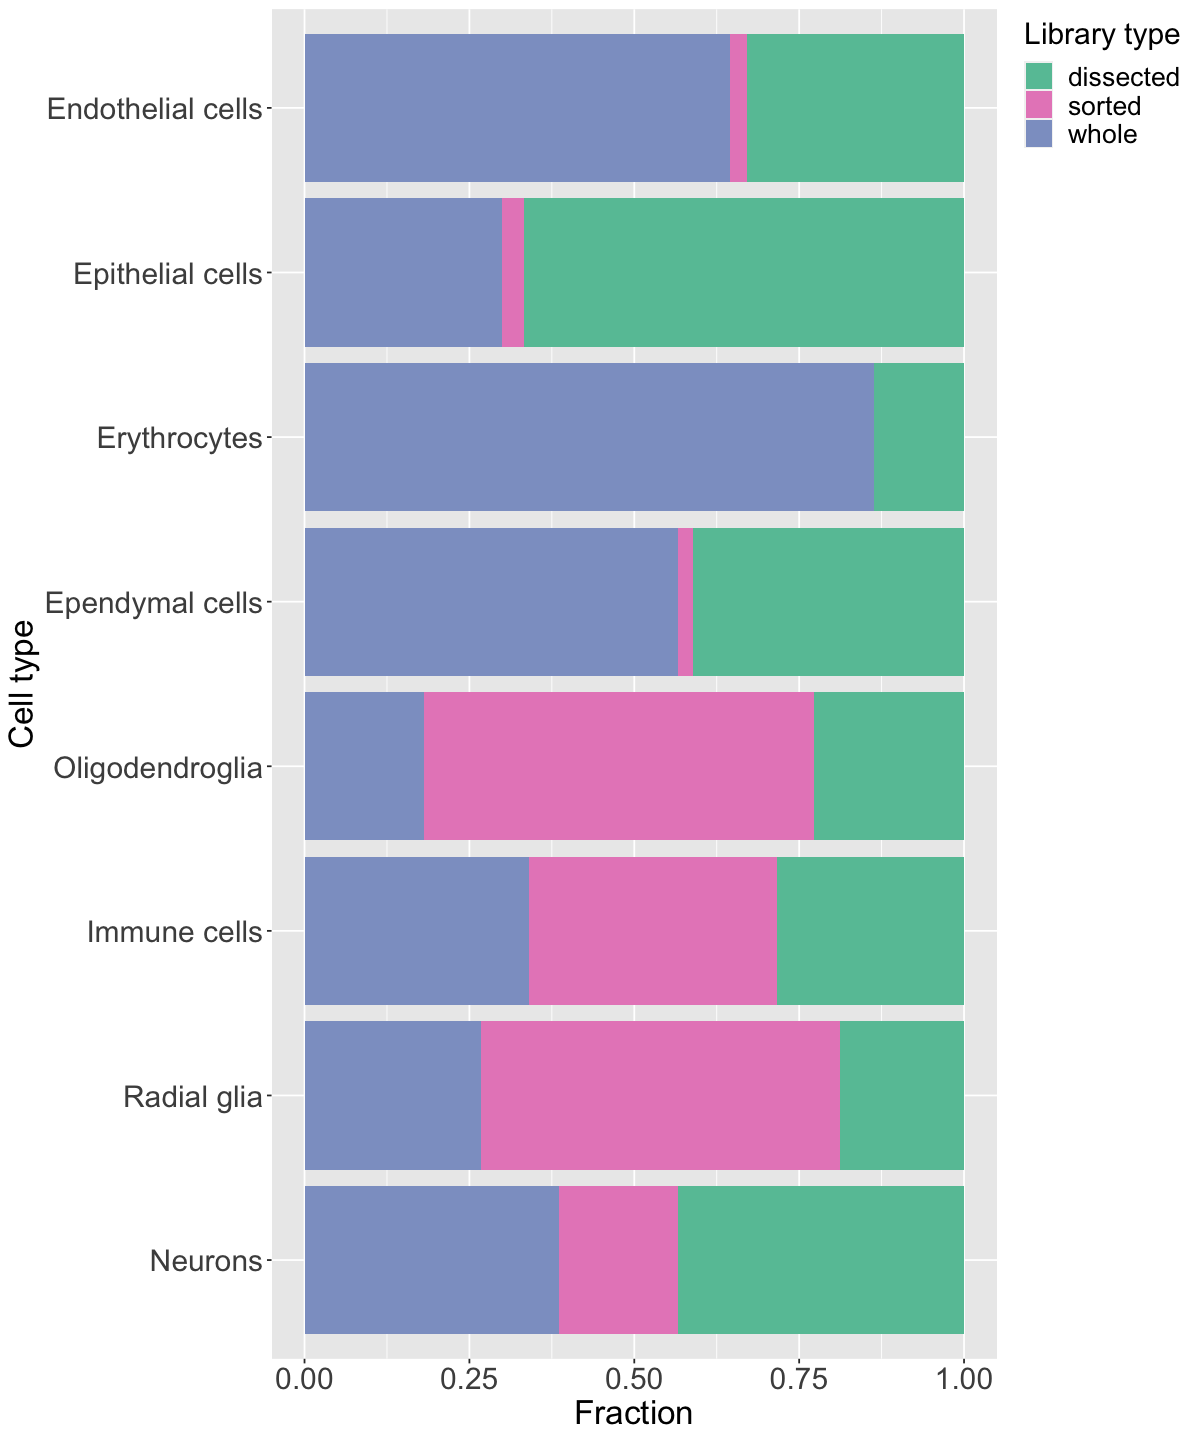

In [46]:
options(repr.plot.width=10, repr.plot.height=12)

p_lt

In [92]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_barplot_libtype.pdf",
       plot = p_lt, units = "in", height = 10, width = 8)

Alternate version for manuscript: horizontal, remove background grid + reposition legend

In [47]:
p_lt <- ggplot(data = lib.type.by.celltype.perc2a, aes(x = Cell.type, y = Fraction, fill = Lib.type)) + 
    geom_bar(stat="identity", position = "fill") + 
    coord_cartesian(ylim = c(0,1)) + 
    labs(x="", y="Fraction", fill = "Library type") +  
    theme(axis.title = element_text(size = 20), axis.text = element_text(size = 18), axis.text.x = element_text(angle = 45, hjust = 1), 
          legend.title = element_text(size = 20), legend.text = element_text(size = 18), legend.position = "top",
          panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_rect(fill = "white")) + 
    scale_fill_manual(values = libtype_colors) 

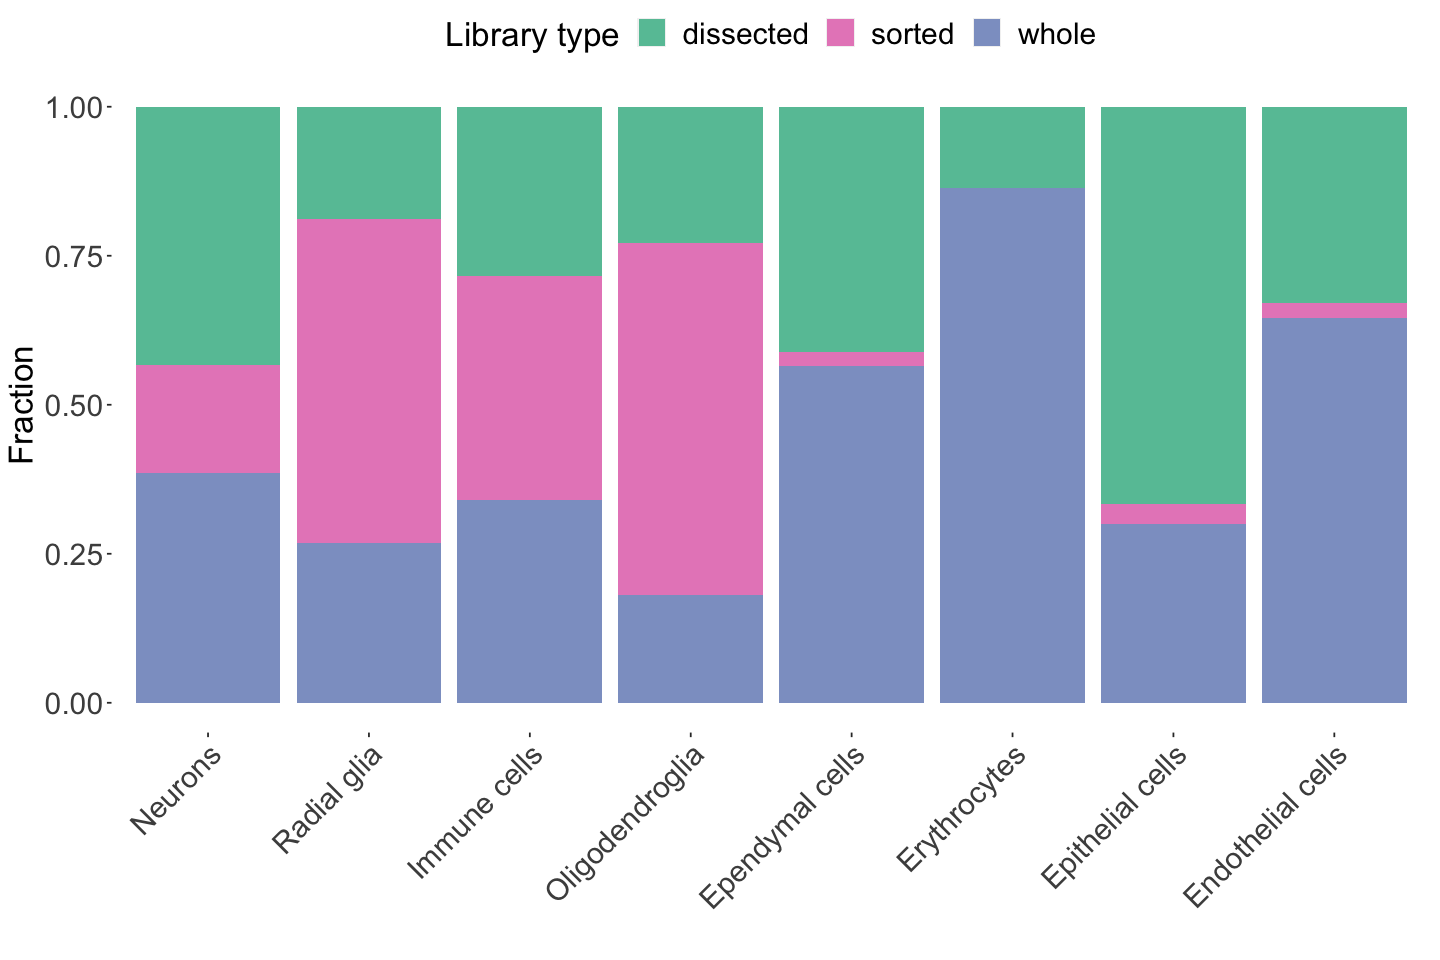

In [48]:
options(repr.plot.width=12, repr.plot.height=8)

p_lt

In [49]:
#save figure pdf
ggsave(filename = "/local/Nina/jupyterlab/brains_trans/figs_seu/brain_barplot_libtype.pdf",
       plot = p_lt, units = "in", height = 8, width = 12)